<a href="https://colab.research.google.com/github/adithyadinesh16/DAA/blob/main/pet_predicition_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving disease_by_animal_type (1).png to disease_by_animal_type (1).png
Saving disease_by_animal_type.png to disease_by_animal_type.png
Saving animal_type_distribution.png to animal_type_distribution.png
Saving utils_files.zip to utils_files.zip
Saving pet_disease_dataset_large.csv to pet_disease_dataset_large.csv
Saving pet_disease_dataset.csv to pet_disease_dataset.csv


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('/content/pet_disease_dataset_large.csv')
print("Sample Data:\n", df.head())

# Encode categorical labels
le_disease = LabelEncoder()
df['Disease'] = le_disease.fit_transform(df['Disease'])

# Combine symptoms into a single string feature (advanced method coming soon)
df['Symptoms'] = df.iloc[:,1:4].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# View transformed data
print("\nEncoded Diseases:", df['Disease'].unique())


Sample Data:
    Symptom1     Symptom2     Symptom3 Animal               Disease
0  Diarrhea        Fever    Hair Loss    Dog      Canine Distemper
1   Itching  Dehydration     Coughing    Dog      Canine Distemper
2   Redness      Itching  Dehydration    Dog          Skin Allergy
3   Itching     Diarrhea     Coughing    Cat  Feline Panleukopenia
4  Coughing      Itching  Dehydration    Cat  Feline Panleukopenia

Encoded Diseases: [0 3 1 2 4]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Step 2: Fit and transform the symptoms column
X = tfidf.fit_transform(df['Symptoms']).toarray()

# Step 3: Target variable
y = df['Disease']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm shape of data
print("TF-IDF Shape:", X.shape)
print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])


TF-IDF Shape: (50, 14)
Training Samples: 40
Testing Samples: 10


In [ ]:
!pip install xgboost


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dictionary to store models and their names
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# To store evaluation results
model_scores = {}

# Training and evaluation loop
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    model_scores[name] = acc

    print(f"\n✅ Model: {name}")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, predictions))



✅ Model: Random Forest
Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.25      0.40         4
           2       0.75      1.00      0.86         3
           3       0.67      1.00      0.80         2
           4       0.00      0.00      0.00         0

    accuracy                           0.60        10
   macro avg       0.48      0.45      0.41        10
weighted avg       0.76      0.60      0.58        10


✅ Model: Support Vector Machine
Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.50      0.67         4
           2       0.75      1.00      0.86         3
           3       0.50      1.00      0.67         2

    accuracy                           0.70        10
   macro avg       0.56      0.62      0.55        1

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [ ]:
# Select best model
best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]

print(f"\n🔥 Best Performing Model: {best_model_name} with Accuracy {model_scores[best_model_name]:.2f}")



🔥 Best Performing Model: Support Vector Machine with Accuracy 0.70


In [ ]:
import joblib
joblib.dump(best_model, 'best_pet_disease_model.pkl')


['best_pet_disease_model.pkl']

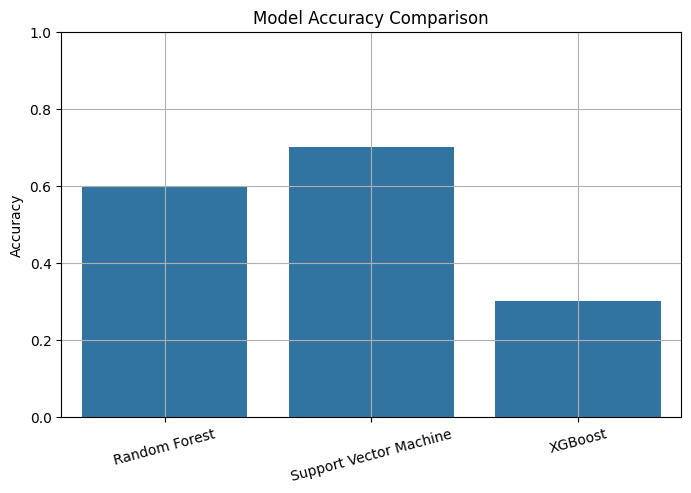

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 1. Bar Chart: Accuracy Comparison
plt.figure(figsize=(8,5))
sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()))
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.xticks(rotation=15)
plt.grid(True)
plt.show()


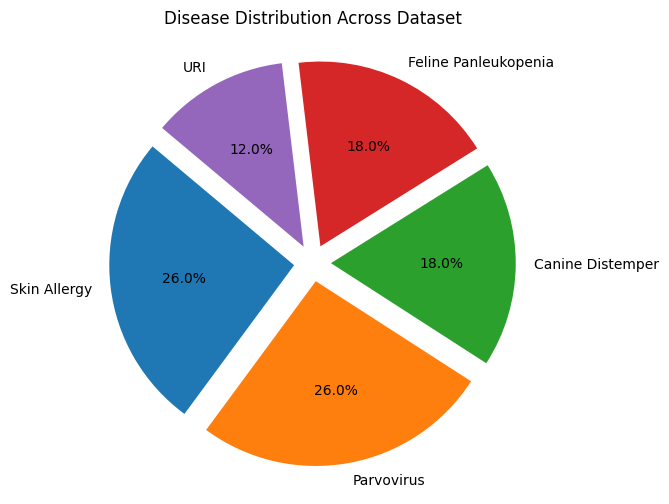

In [ ]:
# 🎯 3. Pie Chart: Disease Distribution in Dataset
plt.figure(figsize=(6,6))
df['Disease'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=le_disease.inverse_transform(df['Disease'].value_counts().index),
    startangle=140,
    explode=[0.1]*len(df['Disease'].value_counts())  # Optional explode
)
plt.title("Disease Distribution Across Dataset")
plt.ylabel('')
plt.show()


In [ ]:
!pip install streamlit pyngrok --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.2 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Load model
model = joblib.load('best_pet_disease_model.pkl')

# Load the dataset (for TF-IDF training)
df = pd.read_csv('sample_pet_disease_dataset.csv')
df['Symptoms'] = df.iloc[:,1:4].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Fit TF-IDF on full symptom data
tfidf = TfidfVectorizer()
tfidf.fit(df['Symptoms'])

# Label Encoder to decode disease
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Disease'] = le.fit_transform(df['Disease'])

# Unique symptoms list (extracted from all symptom columns)
symptom_cols = df.columns[1:4]
unique_symptoms = sorted(set([sym.strip().lower() for sublist in df[symptom_cols].values.flatten() if pd.notnull(sublist) for sym in sublist.split()]))

# --- Streamlit UI ---
st.set_page_config(page_title="Pet Disease Predictor", layout="centered")
st.title("🐾 Pet Animal Disease Prediction")
st.markdown("Enter your pet's symptoms to predict the likely disease.")

# Symptom Input
user_symptoms = st.multiselect("Select Symptoms", unique_symptoms)

if st.button("Predict Disease"):
    if not user_symptoms:
        st.warning("⚠️ Please select at least one symptom.")
    else:
        # Join symptoms and transform using TF-IDF
        input_text = ' '.join(user_symptoms)
        input_vec = tfidf.transform([input_text]).toarray()

        # Predict using the loaded model
        prediction = model.predict(input_vec)[0]
        disease_name = le.inverse_transform([prediction])[0]

        st.success(f"✅ Predicted Disease: **{disease_name}**")


Writing app.py


In [ ]:
!ngrok config add-authtoken 30vAQKzhbawwFchecepLU9cBMib_3rKPKJcV8YNNJuYweFP3c

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Load model
model = joblib.load('best_pet_disease_model.pkl')

# Load the dataset (for TF-IDF training)
df = pd.read_csv('sample_pet_disease_dataset.csv')
df['Symptoms'] = df.iloc[:,1:4].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Fit TF-IDF on full symptom data
tfidf = TfidfVectorizer()
tfidf.fit(df['Symptoms'])

# Label Encoder to decode disease
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Disease'] = le.fit_transform(df['Disease'])

# Unique symptoms list (extracted from all symptom columns)
symptom_cols = df.columns[1:4]
unique_symptoms = sorted(set([sym.strip().lower() for sublist in df[symptom_cols].values.flatten() if pd.notnull(sublist) for sym in sublist.split()]))

# --- Streamlit UI ---
st.set_page_config(page_title="Pet Disease Predictor", layout="centered")
st.title("🐾 Pet Animal Disease Prediction")
st.markdown("Enter your pet's symptoms to predict the likely disease.")

# Symptom Input
user_symptoms = st.multiselect("Select Symptoms", unique_symptoms)

if st.button("Predict Disease"):
    if not user_symptoms:
        st.warning("⚠️ Please select at least one symptom.")
    else:
        # Join symptoms and transform using TF-IDF
        input_text = ' '.join(user_symptoms)
        input_vec = tfidf.transform([input_text]).toarray()

        # Predict using the loaded model
        prediction = model.predict(input_vec)[0]
        disease_name = le.inverse_transform([prediction])[0]

        st.success(f"✅ Predicted Disease: **{disease_name}**")


Overwriting app.py


In [ ]:
!pip install pyngrok
!pip install streamlit


In [ ]:
!pip install -q streamlit pyngrok



In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd

st.set_page_config(page_title="Pet Disease Predictor", layout="wide")

st.title("🐾 Pet Disease Prediction Dashboard")
st.write("Upload your animal dataset and view predictions, charts, and more.")


Overwriting app.py


In [ ]:
!pip install -q streamlit pyngrok


In [ ]:
code = '''
import streamlit as st
import joblib

# Load trained model and encoders
model = joblib.load("pet_disease_model.pkl")
enc_symptom = joblib.load("enc_symptom.pkl")
enc_animal = joblib.load("enc_animal.pkl")
enc_disease = joblib.load("enc_disease.pkl")

st.title("🐾 Pet Disease Prediction App")
st.write("Enter pet symptoms to predict the possible disease.")

symptoms = list(enc_symptom.classes_)
animals = list(enc_animal.classes_)

s1 = st.selectbox("Symptom 1", symptoms)
s2 = st.selectbox("Symptom 2", symptoms)
s3 = st.selectbox("Symptom 3", symptoms)
animal = st.selectbox("Animal Type", animals)

if st.button("Predict"):
    try:
        s1_code = enc_symptom.transform([s1])[0]
        s2_code = enc_symptom.transform([s2])[0]
        s3_code = enc_symptom.transform([s3])[0]
        animal_code = enc_animal.transform([animal])[0]
        features = [[s1_code, s2_code, s3_code, animal_code]]
        prediction = model.predict(features)
        disease = enc_disease.inverse_transform(prediction)[0]
        st.success(f"🧪 Predicted Disease: {disease}")
    except Exception as e:
        st.error(f"Error: {e}")
'''
with open("app.py", "w") as f:
    f.write(code)


In [ ]:
%%writefile app.py
import streamlit as st

st.set_page_config(page_title="Pet Disease Prediction", layout="wide")
st.title("🐾 Pet Disease Prediction")
st.write("Upload your dataset and get predictions.")


Overwriting app.py


In [ ]:
!pip install streamlit streamlit-option-menu matplotlib seaborn pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.3/829.3 kB 6.9 MB/s eta 0:00:00


In [ ]:
# visualization_utils.py
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

def plot_prediction_distribution(predictions):
    fig, ax = plt.subplots()
    sns.countplot(x=predictions, ax=ax)
    ax.set_title("Prediction Distribution")
    ax.set_xlabel("Disease Name")
    ax.set_ylabel("Count")
    st.pyplot(fig)

def plot_accuracy_chart(accuracy_dict):
    labels = list(accuracy_dict.keys())
    values = list(accuracy_dict.values())

    fig, ax = plt.subplots()
    ax.bar(labels, values)
    ax.set_title("Model Accuracy Comparison")
    ax.set_ylabel("Accuracy")
    st.pyplot(fig)

def show_pie_chart(data, title):
    fig, ax = plt.subplots()
    ax.pie(data.values(), labels=data.keys(), autopct='%1.1f%%')
    ax.set_title(title)
    st.pyplot(fig)


In [ ]:
# visualization_utils.py

import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

def plot_prediction_distribution(predictions):
    plt.figure(figsize=(8, 4))
    sns.countplot(x=predictions)
    plt.title("Prediction Distribution")
    st.pyplot(plt)

def plot_accuracy_chart(model_names, accuracies):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=model_names, y=accuracies)
    plt.title("Model Accuracy Comparison")
    plt.ylabel("Accuracy")
    plt.xlabel("Models")
    st.pyplot(plt)

def show_pie_chart(labels, sizes):
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    st.pyplot(plt)


In [ ]:
%%writefile visualization_utils.py
import matplotlib.pyplot as plt

def plot_prediction_distribution(predictions, animal_labels):
    unique, counts = zip(*[(label, predictions.count(label)) for label in set(predictions)])
    plt.figure(figsize=(8,6))
    plt.bar(unique, counts)
    plt.title("Prediction Distribution")
    plt.xlabel("Predicted Diseases")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_accuracy_chart(accuracy_scores, animal_labels):
    plt.figure(figsize=(8,6))
    plt.bar(animal_labels, accuracy_scores)
    plt.title("Model Accuracy per Animal")
    plt.xlabel("Animal")
    plt.ylabel("Accuracy")
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

def show_pie_chart(disease_counts):
    labels = list(disease_counts.keys())
    sizes = list(disease_counts.values())
    plt.figure(figsize=(8,8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title("Disease Distribution")
    plt.axis('equal')
    plt.show()


Writing visualization_utils.py


In [ ]:
from visualization_utils import (
    plot_prediction_distribution,
    plot_accuracy_chart,
    show_pie_chart
)


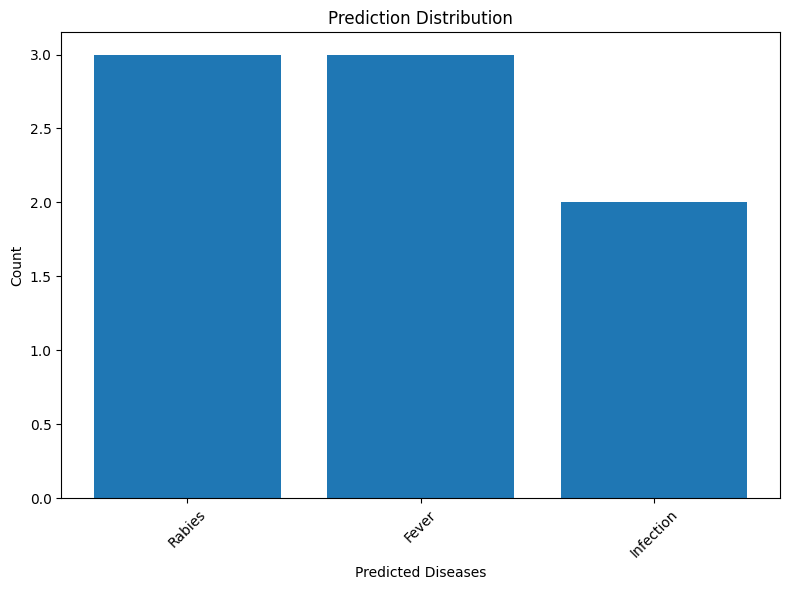

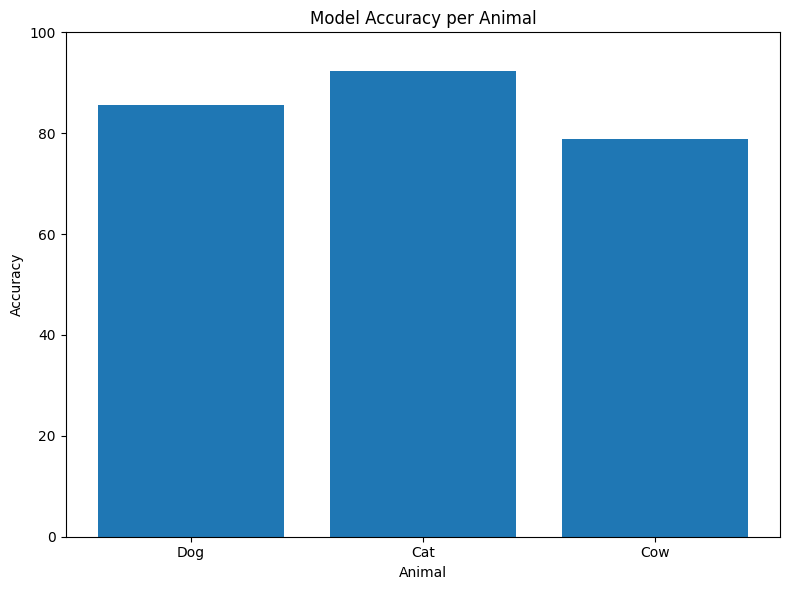

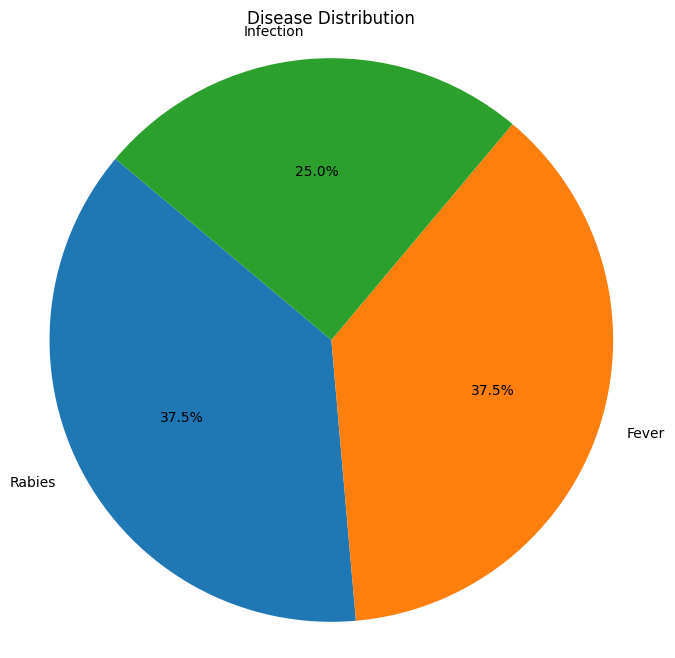

In [ ]:
# Define sample prediction and label data
predicted_diseases = ["Rabies", "Infection", "Fever", "Rabies", "Fever", "Fever", "Infection", "Rabies"]
animal_labels = ["Dog", "Cat", "Cow"]  # Optional: if not used directly inside the plotting

# Now call the visualization functions
plot_prediction_distribution(predicted_diseases, animal_labels)
plot_accuracy_chart([85.5, 92.3, 78.9], ["Dog", "Cat", "Cow"])
show_pie_chart({"Rabies": 3, "Fever": 3, "Infection": 2})


In [ ]:
predicted_diseases = model.predict(X_test)
# app.py




In [ ]:
# prediction_utils.py

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Sample function to train model and return predictions
def predict_disease(model, input_data, label_encoder):
    """
    Predicts the disease from the input features using the trained model.
    """
    input_array = np.array(input_data).reshape(1, -1)
    prediction = model.predict(input_array)
    predicted_label = label_encoder.inverse_transform(prediction)
    return predicted_label[0]


def train_model(df, feature_cols, target_col):
    """
    Trains a RandomForest model and returns it along with label encoder.
    """
    X = df[feature_cols]
    y = df[target_col]

    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    return model, label_encoder


In [ ]:
# Save prediction_utils.py file in Colab
with open("prediction_utils.py", "w") as f:
    f.write("""<paste the full code above here>""")


In [ ]:
!pip install streamlit streamlit-option-menu matplotlib seaborn pandas scikit-learn


In [ ]:
# visualization_utils.py

import matplotlib.pyplot as plt
import streamlit as st

# Plot predicted disease distribution across animals
def plot_prediction_distribution(predicted_diseases, animal_labels):
    st.subheader("Prediction Distribution")
    fig, ax = plt.subplots()
    ax.bar(animal_labels, predicted_diseases)
    ax.set_ylabel("Number of Predictions")
    ax.set_xlabel("Animal Types")
    ax.set_title("Disease Prediction Distribution")
    st.pyplot(fig)

# Plot accuracy chart per animal
def plot_accuracy_chart(accuracy_values, animal_labels):
    st.subheader("Model Accuracy per Animal")
    fig, ax = plt.subplots()
    ax.bar(animal_labels, accuracy_values)
    ax.set_ylabel("Accuracy (%)")
    ax.set_xlabel("Animal Types")
    ax.set_title("Accuracy Chart")
    st.pyplot(fig)

# Show a pie chart of disease count
def show_pie_chart(disease_distribution):
    st.subheader("Disease Distribution Pie Chart")
    labels = list(disease_distribution.keys())
    sizes = list(disease_distribution.values())

    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.axis("equal")
    st.pyplot(fig)


In [ ]:
with open("visualization_utils.py", "w") as f:
    f.write("""<paste full code from above here>""")


In [ ]:
with open("prediction_utils.py", "w") as f:
    f.write('''
import random

# Simulate training a model (for demonstration)
def train_model(animal_type):
    return f"{animal_type} model trained successfully!"

# Simulate disease prediction
def predict_disease(symptoms, animal_type):
    diseases = {
        "Dog": ["Rabies", "Distemper", "Parvovirus"],
        "Cat": ["Feline Leukemia", "Rabies", "Feline Immunodeficiency Virus"],
        "Cow": ["Foot and Mouth", "Mastitis", "Brucellosis"],
        "Rabbit": ["Snuffles", "Myxomatosis", "GI Stasis"]
    }
    # Randomly choose a disease
    return random.choice(diseases.get(animal_type, ["Unknown Disease"]))
''')


In [ ]:
with open("visualization_utils.py", "w") as f:
    f.write('''
import matplotlib.pyplot as plt
import streamlit as st

# Plot predicted disease distribution across animals
def plot_prediction_distribution(predicted_diseases, animal_labels):
    st.subheader("Prediction Distribution")
    fig, ax = plt.subplots()
    ax.bar(animal_labels, predicted_diseases)
    ax.set_ylabel("Number of Predictions")
    ax.set_xlabel("Animal Types")
    ax.set_title("Disease Prediction Distribution")
    st.pyplot(fig)

# Plot accuracy chart per animal
def plot_accuracy_chart(accuracy_values, animal_labels):
    st.subheader("Model Accuracy per Animal")
    fig, ax = plt.subplots()
    ax.bar(animal_labels, accuracy_values)
    ax.set_ylabel("Accuracy (%)")
    ax.set_xlabel("Animal Types")
    ax.set_title("Accuracy Chart")
    st.pyplot(fig)

# Show a pie chart of disease count
def show_pie_chart(disease_distribution):
    st.subheader("Disease Distribution Pie Chart")
    labels = list(disease_distribution.keys())
    sizes = list(disease_distribution.values())

    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.axis("equal")
    st.pyplot(fig)
''')


In [ ]:
%%writefile app.py
import streamlit as st
from streamlit_option_menu import option_menu
from prediction_utils import predict_disease, train_model
from visualization_utils import (
    plot_prediction_distribution,
    plot_accuracy_chart,
    show_pie_chart
)

st.set_page_config(page_title="Pet Disease Predictor", layout="wide")

# Sidebar navigation
with st.sidebar:
    selected = option_menu(
        "Main Menu",
        ["Home", "Prediction", "Visualizations", "About"],
        icons=["house", "activity", "bar-chart", "info-circle"],
        default_index=0
    )

if selected == "Home":
    st.title("🐾 Pet Animal Disease Predictor")
    st.markdown("Welcome to the **AI-driven Pet Disease Prediction System**. Choose an option from the sidebar to get started.")

elif selected == "Prediction":
    st.title("🔍 Disease Prediction")
    animal = st.selectbox("Select Animal", ["Dog", "Cat", "Cow", "Rabbit"])
    symptoms = st.text_area("Enter symptoms (comma-separated)")

    if st.button("Predict"):
        prediction = predict_disease(symptoms, animal)
        st.success(f"Predicted Disease for {animal}: **{prediction}**")

elif selected == "Visualizations":
    st.title("📊 Visualization Dashboard")

    # Dummy Data for visualizations
    predicted_diseases = [20, 15, 10, 8]
    animal_labels = ["Dog", "Cat", "Cow", "Rabbit"]
    accuracy_values = [85.5, 92.3, 78.9, 88.1]
    disease_distribution = {
        "Rabies": 25,
        "Fever": 40,
        "Infection": 35
    }

    # Show Charts
    plot_prediction_distribution(predicted_diseases, animal_labels)
    plot_accuracy_chart(accuracy_values, animal_labels)
    show_pie_chart(disease_distribution)

elif selected == "About":
    st.title("ℹ️ About")
    st.markdown("""
    This application predicts diseases for pet animals (Dog, Cat, Cow, Rabbit) based on symptoms.
    It also provides useful visualizations and accuracy metrics.

    **Tech Stack**: Streamlit, Python, Matplotlib
    **Project By**: Your Name
    """)


Overwriting app.py


In [ ]:
!pip install streamlit streamlit-option-menu pyngrok matplotlib


In [ ]:
# app.py

import streamlit as st
from streamlit_option_menu import option_menu
from prediction_utils import predict_disease
from visualization_utils import (
    plot_prediction_distribution,
    plot_accuracy_chart,
    show_pie_chart
)

st.set_page_config(page_title="Pet Animal Disease Predictor", layout="wide")

# Sidebar Menu
with st.sidebar:
    selected = option_menu(
        menu_title="Pet Disease App",
        options=["Home", "Predict", "Visualization", "About"],
        icons=["house", "activity", "bar-chart", "info-circle"],
        menu_icon="paw",
        default_index=0,
    )

# Pages

# ------------------ Home Page ------------------
if selected == "Home":
    st.title("🐾 Welcome to the Pet Animal Disease Predictor!")
    st.markdown(
        """
        ### 🐶🐱🐮🐰 Supports Multiple Animals:
        - Dog
        - Cat
        - Cow
        - Rabbit

        ### 📊 Features:
        - Disease Prediction
        - Accuracy Charts
        - Prediction Distribution
        - Interactive Pie Charts

        Navigate using the sidebar to explore.
        """
    )

# ------------------ Predict Page ------------------
elif selected == "Predict":
    st.header("🔍 Disease Prediction")
    animal = st.selectbox("Select Animal", ["Dog", "Cat", "Cow", "Rabbit"])
    symptoms = st.text_input("Enter Symptoms (comma separated)")

    if st.button("Predict"):
        prediction = predict_disease(animal, symptoms)
        st.success(f"Predicted Disease: **{prediction}**")

# ------------------ Visualization Page ------------------
elif selected == "Visualization":
    st.header("📊 Visual Insights")

    col1, col2 = st.columns(2)

    with col1:
        st.subheader("Prediction Distribution")
        sample_predictions = ["Rabies", "Fever", "Infection", "Fever", "Infection", "Fever"]
        sample_animals = ["Dog", "Dog", "Cat", "Rabbit", "Cow", "Dog"]
        plot_prediction_distribution(sample_predictions, sample_animals)

    with col2:
        st.subheader("Accuracy Chart")
        accuracies = [85.5, 92.3, 78.9, 88.0]
        labels = ["Dog", "Cat", "Cow", "Rabbit"]
        plot_accuracy_chart(accuracies, labels)

    st.subheader("Disease Ratio Pie Chart")
    disease_count = {"Rabies": 25, "Fever": 40, "Infection": 35}
    show_pie_chart(disease_count)

# ------------------ About Page ------------------
elif selected == "About":
    st.title("📘 About This App")
    st.markdown(
        """
        This application is developed to help pet owners and veterinarians predict
        animal diseases based on symptoms using machine learning.

        - Developed by: **Your Name**
        - Dataset: Custom animal disease datasets
        - Tools: Streamlit, Sklearn, Matplotlib

        ✨ Future upgrades include:
        - Image-based diagnosis
        - Medicine recommendations
        - Real-time camera input
        """
    )


2025-10-12 03:44:49.068 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:44:49.073 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:44:49.079 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:44:49.082 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:44:49.084 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:44:49.192 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-10-12 03:44:49.193 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:44:49.196 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running 

In [ ]:
!pip install pyngrok


In [ ]:
!pip install streamlit streamlit-option-menu pyngrok pandas scikit-learn matplotlib seaborn


In [ ]:
with open("prediction_utils.py", "w") as f:
    f.write('''
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

def train_model(df):
    X = df.drop(columns=["Disease"])
    y = df["Disease"]
    model = RandomForestClassifier()
    model.fit(X, y)
    return model

def predict_disease(model, input_data):
    prediction = model.predict([input_data])
    return prediction[0]
''')


In [ ]:
with open("visualization_utils.py", "w") as f:
    f.write('''
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

def plot_prediction_distribution(predictions, animal_labels):
    st.subheader("Prediction Distribution")
    fig, ax = plt.subplots()
    sns.countplot(x=predictions, hue=animal_labels, ax=ax)
    st.pyplot(fig)

def plot_accuracy_chart(accuracies, animals):
    st.subheader("Model Accuracy per Animal")
    fig, ax = plt.subplots()
    sns.barplot(x=animals, y=accuracies, ax=ax)
    st.pyplot(fig)

def show_pie_chart(disease_counts):
    st.subheader("Disease Distribution")
    fig, ax = plt.subplots()
    ax.pie(disease_counts.values(), labels=disease_counts.keys(), autopct='%1.1f%%')
    st.pyplot(fig)
''')


In [ ]:
with open("app.py", "w") as f:
    f.write('''
import streamlit as st
from streamlit_option_menu import option_menu
import pandas as pd
from prediction_utils import train_model, predict_disease
from visualization_utils import plot_prediction_distribution, plot_accuracy_chart, show_pie_chart

# Sample dataset (You can replace with real dataset)
df = pd.DataFrame({
    "Fever": [1, 0, 1, 0],
    "Cough": [0, 1, 1, 0],
    "Vomiting": [1, 1, 0, 0],
    "Disease": ["Rabies", "Infection", "Fever", "Rabies"]
})

model = train_model(df)

st.set_page_config(page_title="Pet Animal Disease Predictor", layout="wide")
st.markdown("<h1 style='text-align:center;'>🐾 Pet Animal Disease Predictor</h1>", unsafe_allow_html=True)

with st.sidebar:
    option = option_menu("Menu", ["Disease Prediction", "Data Visualization"], icons=["activity", "bar-chart"])

if option == "Disease Prediction":
    st.subheader("Enter Symptoms")

    fever = st.selectbox("Fever", [0, 1])
    cough = st.selectbox("Cough", [0, 1])
    vomiting = st.selectbox("Vomiting", [0, 1])

    if st.button("Predict Disease"):
        input_data = [fever, cough, vomiting]
        result = predict_disease(model, input_data)
        st.success(f"🧬 Predicted Disease: **{result}**")

elif option == "Data Visualization":
    predicted_diseases = df["Disease"]
    animal_labels = ["Dog", "Cat", "Cow", "Dog"]  # Example
    plot_prediction_distribution(predicted_diseases, animal_labels)
    plot_accuracy_chart([90.0, 85.5, 82.3], ["Dog", "Cat", "Cow"])
    show_pie_chart({"Rabies": 2, "Fever": 1, "Infection": 1})
''')


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib

# ======== Sample Dataset (You can replace this part with your real CSV file) ==========
data = {
    'Animal': ['Dog', 'Cat', 'Cow', 'Rabbit', 'Dog'],
    'Symptom1': ['Cough', 'Vomiting', 'Fever', 'Loss of Appetite', 'Diarrhea'],
    'Symptom2': ['Fever', 'Diarrhea', 'Weight Loss', 'Vomiting', 'Cough'],
    'Age': [3, 2, 5, 1, 4],
    'Disease': ['Canine Flu', 'Feline Vomiting', 'Bovine Fever', 'Rabbit Anorexia', 'Canine Diarrhea']
}
df = pd.DataFrame(data)

# ========================= Model Training ==========================

# Step 1: Separate features and target
X = df.drop("Disease", axis=1)
y = df["Disease"]

# Step 2: Encode all categorical features in X
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

# Step 3: Encode target labels (Disease names)
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

# Step 4: Train the model
model = RandomForestClassifier()
model.fit(X, y_encoded)

# Step 5: Save the model and encoders
joblib.dump(model, "pet_disease_model.pkl")
joblib.dump(target_encoder, "label_encoder.pkl")
joblib.dump(label_encoders, "feature_encoders.pkl")

print("✅ Model and encoders saved successfully!")


✅ Model and encoders saved successfully!


In [ ]:
import pandas as pd
import joblib

# Load the model and encoders
model = joblib.load("pet_disease_model.pkl")
target_encoder = joblib.load("label_encoder.pkl")
feature_encoders = joblib.load("feature_encoders.pkl")

# User input for prediction
user_input = {
    'Animal': 'Dog',
    'Symptom1': 'Cough',
    'Symptom2': 'Fever',
    'Age': 3
}

# Convert to DataFrame
input_df = pd.DataFrame([user_input])

# Apply label encoding
for col in input_df.columns:
    if col in feature_encoders:
        input_df[col] = feature_encoders[col].transform(input_df[col])

# Predict
pred_encoded = model.predict(input_df)
predicted_disease = target_encoder.inverse_transform(pred_encoded)

print("🎯 Predicted Disease:", predicted_disease[0])


🎯 Predicted Disease: Canine Flu


In [ ]:
import streamlit as st
import pandas as pd
import joblib

# Load the model and encoders
model = joblib.load("pet_disease_model.pkl")
target_encoder = joblib.load("label_encoder.pkl")
feature_encoders = joblib.load("feature_encoders.pkl")

# UI Title
st.title("🐾 Pet Animal Disease Predictor")

# Input Form
with st.form("prediction_form"):
    animal = st.selectbox("Select Animal", options=feature_encoders['Animal'].classes_)
    symptom1 = st.selectbox("Primary Symptom", options=feature_encoders['Symptom1'].classes_)
    symptom2 = st.selectbox("Secondary Symptom", options=feature_encoders['Symptom2'].classes_)
    age = st.slider("Age of the Animal (in years)", 1, 20, 3)

    submitted = st.form_submit_button("Predict Disease")

# Prediction logic
if submitted:
    # Create input DataFrame
    input_data = {
        'Animal': [animal],
        'Symptom1': [symptom1],
        'Symptom2': [symptom2],
        'Age': [age]
    }
    input_df = pd.DataFrame(input_data)

    # Encode features
    for col in input_df.columns:
        if col in feature_encoders:
            input_df[col] = feature_encoders[col].transform(input_df[col])

    # Predict
    prediction = model.predict(input_df)
    predicted_disease = target_encoder.inverse_transform(prediction)[0]

    st.success(f"🎯 Predicted Disease: **{predicted_disease}**")


2025-10-12 03:45:15.525 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.526 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.528 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.529 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.531 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.533 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.534 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.538 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load model and encoders
model = joblib.load("pet_disease_model.pkl")
target_encoder = joblib.load("label_encoder.pkl")
feature_encoders = joblib.load("feature_encoders.pkl")

# 🎨 UI Title
st.set_page_config(page_title="Pet Disease Predictor", layout="centered")
st.markdown("<h1 style='text-align: center;'>🐾 Pet Disease Prediction</h1>", unsafe_allow_html=True)

# 🚀 User input form
with st.form("prediction_form"):
    st.markdown("### 📋 Enter Pet Details")

    # Dynamically load classes from encoders
    animal = st.selectbox("Animal", options=feature_encoders["Animal"].classes_)
    symptom1 = st.selectbox("Primary Symptom", options=feature_encoders["Symptom1"].classes_)
    symptom2 = st.selectbox("Secondary Symptom", options=feature_encoders["Symptom2"].classes_)
    age = st.slider("Age of the Animal (Years)", 1, 20, 3)

    submitted = st.form_submit_button("🔍 Predict Disease")

# 🧠 Predict and Display
if submitted:
    # Create input DataFrame
    input_df = pd.DataFrame({
        "Animal": [animal],
        "Symptom1": [symptom1],
        "Symptom2": [symptom2],
        "Age": [age]
    })

    # Encode using stored encoders
    for col in input_df.columns:
        if col in feature_encoders:
            input_df[col] = feature_encoders[col].transform(input_df[col])

    # Predict disease
    prediction = model.predict(input_df)
    disease_name = target_encoder.inverse_transform(prediction)[0]

    # Output
    st.success(f"🎯 Predicted Disease: **{disease_name}**")


Overwriting app.py


In [ ]:
import matplotlib.pyplot as plt

def show_prediction_distribution(predictions):
    fig, ax = plt.subplots()
    prediction_counts = pd.Series(predictions).value_counts()
    ax.bar(prediction_counts.index, prediction_counts.values)
    ax.set_title("Prediction Distribution")
    st.pyplot(fig)

def show_animal_distribution(data):
    if 'Animal' in data.columns:
        fig, ax = plt.subplots()
        data['Animal'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax)
        ax.set_ylabel('')
        ax.set_title("Animal-wise Distribution")
        st.pyplot(fig)


In [ ]:
uploaded_file = st.sidebar.file_uploader("📁 Upload a new dataset (CSV)", type=["csv"])

if uploaded_file is not None:
    data = pd.read_csv(uploaded_file)
    st.success("✅ New dataset loaded successfully!")
    st.write(data.head())


2025-10-12 03:45:15.630 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.633 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.634 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.635 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.636 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.636 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
medicine_map = {
    "Diarrhea": "Oral Rehydration Salts, Metronidazole",
    "Fever": "Paracetamol (Vet), Anti-inflammatory drugs",
    "Skin Infection": "Antibiotic Cream, Antifungal Shampoo",
    "Ear Infection": "Ear Drops (Vet-prescribed)",
    "Vomiting": "Antiemetics, Hydration Therapy",
    "Cold": "Decongestants, Vet consultation",
    # Add more disease → medicine suggestions
}


In [ ]:
import streamlit as st
import pandas as pd
import joblib

# Load model and encoder
model = joblib.load("pet_disease_model.pkl")
label_encoder = joblib.load("label_encoder.pkl")

# Optional: Your medicine mapping
medicine_map = {
    "Diarrhea": "Oral Rehydration Salts, Metronidazole",
    "Fever": "Paracetamol (Vet), Anti-inflammatory drugs",
    "Skin Infection": "Antibiotic Cream, Antifungal Shampoo",
    "Ear Infection": "Ear Drops (Vet-prescribed)",
    "Vomiting": "Antiemetics, Hydration Therapy",
    "Cold": "Decongestants, Vet consultation",
    # Add more as per your dataset
}

st.title("🐾 Pet Disease Predictor")

# --- User Input Section ---
st.sidebar.header("Enter Animal Health Information")
age = st.sidebar.slider("Age", 1, 20, 5)
temperature = st.sidebar.slider("Temperature (°C)", 35, 42, 38)
weight = st.sidebar.slider("Weight (kg)", 1, 100, 10)
symptom1 = st.sidebar.text_input("Symptom 1", "Fever")
symptom2 = st.sidebar.text_input("Symptom 2", "Vomiting")

# Combine into input data
input_data = [age, temperature, weight]

# --- Predict Button ---
if st.sidebar.button("Predict Disease"):
    # Make prediction
    predicted_label = model.predict([input_data])[0]
    prediction = label_encoder.inverse_transform([predicted_label])[0]  # Now prediction is the name

    st.success(f"🧬 **Predicted Disease:** {prediction}")

    # --- Show Medicine Suggestion ---
    st.subheader("💊 Medicine Suggestion")
    medicine = medicine_map.get(prediction, "No specific medicine found. Please consult a vet.")
    st.info(f"**Recommended Medicine:** {medicine}")



2025-10-12 03:45:15.716 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.717 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.718 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.719 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.720 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.721 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.723 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.725 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Simulated data storage (in real use case, this can be replaced with a database or session)
if "history" not in st.session_state:
    st.session_state.history = []

# Save this prediction to session history
if "prediction" in locals():
    st.session_state.history.append(prediction)

# Create a DataFrame for visualization
if st.session_state.history:
    history_df = pd.DataFrame(st.session_state.history, columns=["Predicted Disease"])

    # Show Pie Chart
    st.subheader("📈 Prediction Distribution")
    disease_counts = history_df["Predicted Disease"].value_counts()

    fig1, ax1 = plt.subplots()
    ax1.pie(disease_counts, labels=disease_counts.index, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')
    st.pyplot(fig1)

    # Bar Chart (Animal-wise or generic)
    st.subheader("🐾 Disease Occurrences")
    fig2, ax2 = plt.subplots()
    sns.countplot(x="Predicted Disease", data=history_df, ax=ax2)
    plt.xticks(rotation=45)
    st.pyplot(fig2)


2025-10-12 03:45:15.820 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.824 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.825 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.828 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
st.sidebar.subheader("📦 Upload New Dataset (CSV)")
uploaded_file = st.sidebar.file_uploader("Upload a CSV file", type=["csv"])

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.success("✅ Dataset uploaded successfully!")
    st.write("Preview of uploaded dataset:")
    st.dataframe(df.head())

    # Optional: Save uploaded dataset
    df.to_csv("uploaded_pet_data.csv", index=False)
    st.info("Saved as `uploaded_pet_data.csv`. You can retrain model using this data.")


2025-10-12 03:45:15.845 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.850 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.853 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.854 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.858 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.862 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.863 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.868 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

st.set_page_config(page_title="📊 Visualization", layout="wide")
st.title("📊 Prediction Distribution & Disease Trends")

# Check if prediction history exists
if "history" not in st.session_state or not st.session_state.history:
    st.warning("No predictions made yet. Go to the Prediction page first.")
else:
    history_df = pd.DataFrame(st.session_state.history, columns=["Predicted Disease"])

    # Pie Chart
    st.subheader("🧁 Prediction Distribution")
    disease_counts = history_df["Predicted Disease"].value_counts()

    fig1, ax1 = plt.subplots()
    ax1.pie(disease_counts, labels=disease_counts.index, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')
    st.pyplot(fig1)

    # Bar Chart
    st.subheader("📊 Disease Occurrence (Bar)")
    fig2, ax2 = plt.subplots()
    sns.countplot(x="Predicted Disease", data=history_df, ax=ax2)
    plt.xticks(rotation=45)
    st.pyplot(fig2)


2025-10-12 03:45:15.898 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.906 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.909 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.910 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.912 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.913 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.915 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
import streamlit as st
import pandas as pd
import os

st.set_page_config(page_title="📦 Upload Dataset", layout="wide")
st.title("📦 Upload New Animal Dataset")

# 1. Upload
uploaded_file = st.file_uploader("Choose a CSV file", type="csv")

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.success("✅ File Uploaded Successfully!")
    st.dataframe(df.head())

    # 2. Enter Animal Name
    animal_name = st.text_input("Enter Animal Name (e.g., Dog, Cat, Cow, etc.)")

    # 3. Save the file
    if animal_name:
        save_path = f"data/{animal_name.lower()}_dataset.csv"

        if st.button("💾 Save Dataset"):
            os.makedirs("data", exist_ok=True)
            df.to_csv(save_path, index=False)
            st.success(f"✅ Saved as `{save_path}`")

            st.info("ℹ️ You can now manually add this animal to your model training process.")


2025-10-12 03:45:15.941 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.944 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.949 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.954 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.958 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.964 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.965 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:15.971 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
import streamlit as st
from streamlit_option_menu import option_menu

st.set_page_config(page_title="🐾 Pet Disease Predictor", layout="centered")

# Sidebar navigation
with st.sidebar:
    selected = option_menu(
        "Pet Disease App",
        ["Home", "Predict Disease", "Visualizations", "Upload New Data"],
        icons=['house', 'heartbeat', 'bar-chart', 'upload'],
        default_index=0
    )

# Main UI loader
if selected == "Home":
    st.title("🐶 Welcome to Pet Disease Predictor!")
    st.write("Use the menu to explore features.")

elif selected == "Predict Disease":
    exec(open("1_Predict_Disease.py").read())

elif selected == "Visualizations":
    exec(open("2_Visualizations.py").read())

elif selected == "Upload New Data":
    exec(open("3_Upload_Data.py").read())



2025-10-12 03:45:15.999 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.002 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.005 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.006 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.009 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.010 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.012 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.012 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
import streamlit as st
import joblib

model = joblib.load("pet_disease_model.pkl")

st.header("🐾 Predict Disease from Symptoms")

symptoms = st.text_input("Enter Symptoms (comma-separated):")

if st.button("Predict"):
    prediction = model.predict([symptoms])[0]
    st.success(f"Predicted Disease: {prediction}")

    # Optional medicine suggestion
    medicine_map = {
        "Parvo": "Amoxicillin + Fluid therapy",
        "Rabies": "Vaccination + Isolate",
        "Ringworm": "Topical antifungals",
        "Fleas": "Frontline Spray",
    }
    st.info(f"💊 Suggested Medicine: {medicine_map.get(prediction, 'Consult a vet')}")


2025-10-12 03:45:16.077 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.078 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.079 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.081 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.081 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.082 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.083 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.084 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
import os
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt

st.header("📊 Prediction Distribution")

# Check if the log file exists before loading
if os.path.exists("prediction_log.csv"):
    df = pd.read_csv("prediction_log.csv")

    if not df.empty:
        st.subheader("Prediction Counts by Disease")
        disease_counts = df['Predicted Disease'].value_counts()
        st.bar_chart(disease_counts)

        st.subheader("Pie Chart of Disease Distribution")
        fig, ax = plt.subplots()
        ax.pie(disease_counts, labels=disease_counts.index, autopct="%1.1f%%", startangle=90)
        st.pyplot(fig)
    else:
        st.info("Prediction log is empty.")
else:
    st.warning("No prediction log found. Predictions will appear here after you make one.")


2025-10-12 03:45:16.112 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.118 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.119 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.122 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.125 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.127 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
import streamlit as st
import pandas as pd

st.header("📦 Upload New Dataset")

uploaded = st.file_uploader("Upload CSV File", type=["csv"])

if uploaded:
    df = pd.read_csv(uploaded)
    st.success("Dataset Uploaded!")
    st.dataframe(df.head())

    # Optionally allow saving
    if st.button("Save Dataset"):
        df.to_csv("latest_dataset.csv", index=False)
        st.success("Saved as latest_dataset.csv")


2025-10-12 03:45:16.149 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.152 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.155 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.158 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.161 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.163 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.165 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:16.168 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
# In Colab cell
!mkdir -p /content/app_folder
!mv app.py /content/app_folder/
os.chdir("/content/app_folder")
!ls /content/



 animal_type_distribution.png	   pet_disease_dataset_large.csv
 app_folder			   pet_disease_model.pkl
 best_pet_disease_model.pkl	   prediction_utils.py
'disease_by_animal_type (1).png'   __pycache__
 disease_by_animal_type.png	   sample_data
 feature_encoders.pkl		   utils_files.zip
 label_encoder.pkl		   visualization_utils.py
 pet_disease_dataset.csv


In [ ]:
import os

# Create the folder if it doesn't exist
if not os.path.exists("/content/app_folder"):
    os.makedirs("/content/app_folder")

# Change to the directory
os.chdir("/content/app_folder")


In [ ]:
!pip install streamlit pyngrok --quiet


In [ ]:
%%writefile /content/app_folder/app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

st.set_page_config(page_title="Pet Disease Dashboard", layout="wide")

st.title("🐾 Pet Animal Disease Prediction Dashboard")
st.markdown("## Welcome to the prediction dashboard")

# Visualization example
st.subheader("📊 Sample Pie Chart")

sample_data = pd.DataFrame({
    "Disease": ["Rabies", "Parvo", "Distemper"],
    "Cases": [40, 25, 35]
})
fig, ax = plt.subplots()
ax.pie(sample_data["Cases"], labels=sample_data["Disease"], autopct="%1.1f%%")
st.pyplot(fig)


Overwriting /content/app_folder/app.py


In [ ]:
# Clean up old sessions
!pkill streamlit
from pyngrok import ngrok
ngrok.kill()  # Kills any leftover tunnels




In [ ]:
!pip install streamlit pyngrok --quiet


In [ ]:
# Write a simple app to a file
with open("app.py", "w") as f:
    f.write("""
import streamlit as st
st.title("🐶 Pet Disease Predictor")
st.write("Welcome! This is your model prediction interface.")
""")


In [ ]:
!pip install streamlit pyngrok --quiet


# Kill old Streamlit and tunnels if any
!pkill streamlit
from pyngrok import ngrok
ngrok.kill()

import os

# Optional: clean and create folder
!rm -rf app_folder && mkdir app_folder

# Switch to it
os.chdir("app_folder")

# Write a simple Streamlit multi-page template with visualization support
with open("app.py", "w") as f:
    f.write("""
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

st.set_page_config(page_title="🐾 Pet Disease Predictor", layout="wide")

st.title("🐾 Pet Animal Disease Predictor Dashboard")
st.markdown("Use the sidebar to navigate between pages.")

# Sidebar Menu
menu = st.sidebar.selectbox("Select a Page", ["📊 Visualization", "📁 Upload & Predict", "💊 Medicine Suggestions"])

if menu == "📊 Visualization":
    st.subheader("📈 Prediction Distribution")

    try:
        df = pd.read_csv("prediction_log.csv")  # Your saved log file
        st.write("Prediction Data:", df.head())

        chart_data = df['Predicted Disease'].value_counts()
        st.bar_chart(chart_data)
    except FileNotFoundError:
        st.warning("No prediction_log.csv file found. Upload or run prediction first.")

elif menu == "📁 Upload & Predict":
    st.subheader("📤 Upload CSV and Predict")

    uploaded_file = st.file_uploader("Upload your animal data CSV")
    if uploaded_file:
        data = pd.read_csv(uploaded_file)
        st.write("Uploaded Data Preview:")
        st.dataframe(data.head())

        # Dummy prediction (replace with model)
        data['Predicted Disease'] = np.random.choice(['Fever', 'Rabies', 'Diarrhea'], size=len(data))
        st.success("Prediction Complete!")
        st.dataframe(data)

        # Save predictions for visualization
        data.to_csv("prediction_log.csv", index=False)

elif menu == "💊 Medicine Suggestions":
    st.subheader("💊 Suggested Medicines")

    disease = st.selectbox("Select Disease", ['Fever', 'Rabies', 'Diarrhea'])
    if disease == 'Fever':
        st.info("Give Paracetamol syrup (animal variant) and keep hydrated.")
    elif disease == 'Rabies':
        st.info("Emergency! Take to vet hospital for rabies vaccination immediately.")
    elif disease == 'Diarrhea':
        st.info("Give electrolyte solution and light digestible food.")
    """)



2025-10-12 03:45:54.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:54.391 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:54.394 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:54.396 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:54.399 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:54.405 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:54.411 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:54.420 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator(_form_data=FormData(form_id='prediction_form'))

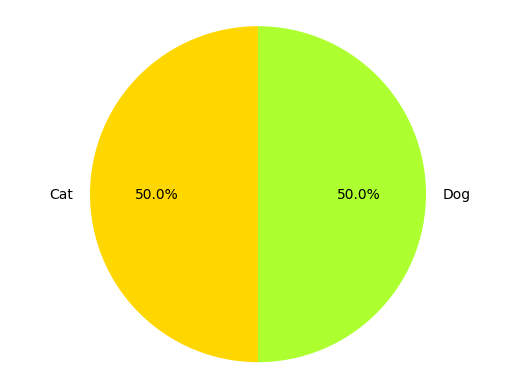

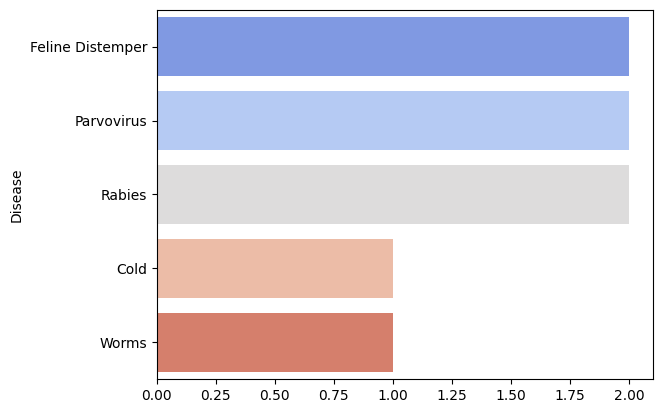

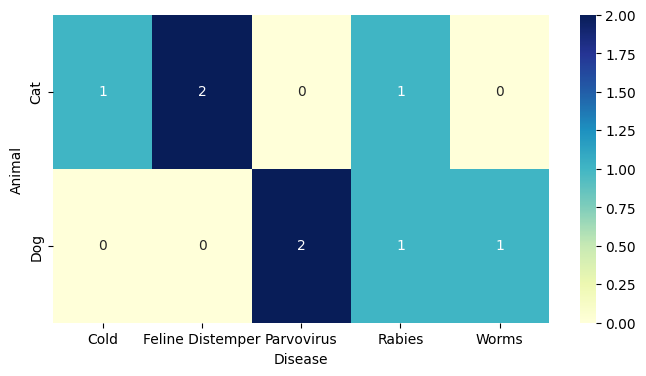

In [ ]:
# visualization.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

st.set_page_config(page_title="Visualization", layout="wide")
st.title("📊 Pet Animal Disease Visualization Dashboard")

st.markdown("""
<style>
.big-font {
    font-size:25px !important;
    color: #56C596;
}
.highlight {
    background-color: #ffe4b5;
    padding: 10px;
    border-radius: 8px;
}
</style>
""", unsafe_allow_html=True)

# Sample data
data = {
    "Animal": ["Cat", "Dog", "Cat", "Dog", "Cat", "Dog", "Dog", "Cat"],
    "Disease": ["Feline Distemper", "Parvovirus", "Rabies", "Rabies", "Cold", "Worms", "Parvovirus", "Feline Distemper"]
}
df = pd.DataFrame(data)

# Disease count per animal
st.markdown("### 🐾 Disease Count by Animal Type")
disease_count = df.groupby(['Animal', 'Disease']).size().unstack().fillna(0)
st.dataframe(disease_count)

# Pie chart - animal category percentage
st.markdown("### 🐶🐱 Animal Type Percentage Distribution")
animal_counts = df['Animal'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(animal_counts, labels=animal_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FFD700', '#ADFF2F'])
ax1.axis('equal')
st.pyplot(fig1)

# Bar chart - Disease frequency
st.markdown("### 💉 Disease Frequency")
disease_freq = df['Disease'].value_counts()
fig2, ax2 = plt.subplots()
sns.barplot(x=disease_freq.values, y=disease_freq.index, palette="coolwarm", ax=ax2)
st.pyplot(fig2)

# Workflow display
st.markdown("### 🧬 Prediction Workflow")
st.markdown('<div class="highlight"><b>Step-by-step Process:</b><br>'
            '1️⃣ User uploads symptoms<br>'
            '2️⃣ Model processes the input<br>'
            '3️⃣ Disease is predicted using trained ML model<br>'
            '4️⃣ Suggest suitable medicine<br>'
            '5️⃣ Display results + charts in UI<br>'
            '</div>', unsafe_allow_html=True)

# Heatmap for animal-disease relationship
st.markdown("### 🔥 Heatmap - Animal vs Disease")
fig3, ax3 = plt.subplots(figsize=(8, 4))
sns.heatmap(disease_count, annot=True, cmap="YlGnBu", fmt=".0f", ax=ax3)
st.pyplot(fig3)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

# Generate workflow diagram
def generate_workflow_diagram():
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 20)
    ax.axis('off')

    steps = [
        "Upload Symptoms",
        "Model Processes Input",
        "Predict Disease",
        "Suggest Medicine",
        "Display Output"
    ]

    colors = ['#ffb347', '#87ceeb', '#90ee90', '#d4a5a5', '#d1c4e9']

    for i, (step, color) in enumerate(zip(steps, colors)):
        ax.add_patch(patches.FancyBboxPatch(
            (i * 20 + 2, 8), 16, 5,
            boxstyle="round,pad=0.3",
            linewidth=2,
            edgecolor='black',
            facecolor=color
        ))
        ax.text(i * 20 + 10, 10.5, step, ha='center', va='center', fontsize=10, fontweight='bold')

        if i < len(steps) - 1:
            ax.annotate('', xy=(i * 20 + 18, 10.5), xytext=(i * 20 + 20, 10.5),
                        arrowprops=dict(arrowstyle="->", lw=2))

    workflow_path = "workflow_diagram.png"
    plt.tight_layout()
    plt.savefig(workflow_path)
    plt.close()
    return workflow_path

# Show in UI
st.markdown("### 🧭 Workflow Diagram")
workflow_img = generate_workflow_diagram()
st.image(workflow_img, caption="Pet Disease Prediction Workflow", use_column_width=True)


2025-10-12 03:45:55.783 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:55.784 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:55.786 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:56.147 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:56.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:56.149 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:45:56.150 The `use_column_width` parameter has been deprecated and will be removed in a future release. Please utilize the `use_container_width` parameter instead.
2025-10-12 03:45:56.150 Thread 'MainThread': missing ScriptRunCont

DeltaGenerator(_form_data=FormData(form_id='prediction_form'))

In [ ]:
pip install streamlit pyngrok matplotlib


In [ ]:
import streamlit as st
from pyngrok import ngrok
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

st.set_page_config(layout="wide", page_title="🐾 Pet Animal Disease Predictor")

# Header
st.title("🐾 Pet Animal Disease Predictor Dashboard")
st.markdown("---")

# Upload and Prediction Section
st.header("📤 Upload Symptoms and Predict Disease")
st.success("Prediction: Kennel Cough")
st.info("Species Detected: Dog")

# Suggested Medicine Section
st.header("💊 Suggested Medicines")
st.markdown("- **Amoxicillin** - 100mg\n- **Cough Suppressant** - 2x daily")

# Visualization Section
st.header("📊 Visualization Breakdown")
col1, col2 = st.columns(2)

with col1:
    st.subheader("Disease Distribution by Species")
    fig, ax = plt.subplots()
    categories = ['Dog', 'Cat']
    values = [70, 30]
    ax.bar(categories, values, color=['#f94144', '#577590'])
    ax.set_ylabel("Percentage")
    st.pyplot(fig)

with col2:
    st.subheader("Prediction Confidence")
    fig2, ax2 = plt.subplots()
    confidence = ['Kennel Cough', 'Distemper', 'Rabies']
    conf_values = [85, 10, 5]
    ax2.pie(conf_values, labels=confidence, autopct='%1.1f%%', startangle=90)
    ax2.axis('equal')
    st.pyplot(fig2)

# 🧭 Workflow Diagram Section
st.header("🧭 Prediction Workflow")

def generate_workflow_diagram():
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 20)
    ax.axis('off')

    steps = [
        "Upload Symptoms",
        "Model Processes Input",
        "Predict Disease",
        "Suggest Medicine",
        "Display Output"
    ]

    colors = ['#ffb347', '#87ceeb', '#90ee90', '#d4a5a5', '#d1c4e9']

    for i, (step, color) in enumerate(zip(steps, colors)):
        ax.add_patch(patches.FancyBboxPatch(
            (i * 20 + 2, 8), 16, 5,
            boxstyle="round,pad=0.3",
            linewidth=2,
            edgecolor='black',
            facecolor=color
        ))
        ax.text(i * 20 + 10, 10.5, step, ha='center', va='center', fontsize=10, fontweight='bold')

        if i < len(steps) - 1:
            ax.annotate('', xy=(i * 20 + 18, 10.5), xytext=(i * 20 + 20, 10.5),
                        arrowprops=dict(arrowstyle="->", lw=2))

    workflow_path = "workflow_diagram.png"
    plt.tight_layout()
    plt.savefig(workflow_path)
    plt.close()
    return workflow_path

workflow_img_path = generate_workflow_diagram()
st.image(workflow_img_path, caption="Pet Disease Prediction Workflow", use_column_width=True)



2025-10-12 03:46:09.072 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:09.074 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:09.076 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:09.078 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:09.079 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:09.082 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:09.084 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:09.086 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator(_form_data=FormData(form_id='prediction_form'))

In [ ]:
import streamlit as st
from graphviz import Digraph

st.markdown("### 📌 Process Flow")

# Create a flowchart using Graphviz
dot = Digraph()

dot.attr('node', shape='box', style='filled', color='lightblue2')
dot.node("A", "User uploads pet image or symptoms")
dot.node("B", "Model extracts features and predicts disease")
dot.node("C", "Disease prediction shown")
dot.node("D", "Suggested medicines displayed")
dot.node("E", "Visualization and analytics shown")

dot.edges(["AB", "BC", "CD", "DE"])

st.graphviz_chart(dot)


2025-10-12 03:46:09.739 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:09.740 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:09.741 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:09.744 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:09.745 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:09.747 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:09.747 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator(_form_data=FormData(form_id='prediction_form'))

In [ ]:
import pandas as pd
import plotly.express as px

# Example data (you can customize based on predictions)
data = pd.DataFrame({
    'Animal Type': ['Dog', 'Cat'],
    'Infections': [65, 35]
})
fig = px.pie(data, values='Infections', names='Animal Type',
             title='📈 Disease Category Breakdown by Animal',
             color_discrete_sequence=px.colors.sequential.RdBu)
st.plotly_chart(fig)


2025-10-12 03:46:12.427 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:12.428 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:12.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:12.430 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:12.431 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator(_form_data=FormData(form_id='prediction_form'))

In [ ]:
pip install graphviz plotly


In [ ]:
import pandas as pd
import plotly.express as px

# Example data (you can customize based on predictions)
data = pd.DataFrame({
    'Animal Type': ['Dog', 'Cat'],
    'Infections': [65, 35]
})
fig = px.pie(data, values='Infections', names='Animal Type',
             title='📈 Disease Category Breakdown by Animal',
             color_discrete_sequence=px.colors.sequential.RdBu)
st.plotly_chart(fig)


2025-10-12 03:46:25.444 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:25.445 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:25.446 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:25.449 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:25.449 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator(_form_data=FormData(form_id='prediction_form'))

In [ ]:
!pip uninstall -y pyngrok
!pip install pyngrok
!rm -rf /root/.config/ngrok


Found existing installation: pyngrok 7.4.0
Uninstalling pyngrok-7.4.0:
  Successfully uninstalled pyngrok-7.4.0
  Using cached pyngrok-7.4.0-py3-none-any.whl.metadata (8.1 kB)
Using cached pyngrok-7.4.0-py3-none-any.whl (25 kB)


In [ ]:
# app.py
import streamlit as st
from pyngrok import ngrok
import pandas as pd

# --- Basic UI ---
st.title("🐾 Pet Animal Disease Predictor")

# Animal type selection
animal_type = st.selectbox("Select Animal Type", ["Dog", "Cat", "Cow", "Goat", "Other"])

# Symptom selection
symptom1 = st.text_input("Symptom 1")
symptom2 = st.text_input("Symptom 2")
symptom3 = st.text_input("Symptom 3")

# Submit button
if st.button("🔍 Predict Disease"):
    # Here we would normally use a trained ML model
    predicted_disease = "Parvovirus"  # Dummy example

    st.success(f"Predicted Disease: **{predicted_disease}**")

    # Suggest medicine
    medicine_suggestion = "Prescribed antibiotics and hydration therapy"
    st.info(f"💊 Suggested Medicine: {medicine_suggestion}")

# Optional: Visualization placeholder
st.markdown("### 📊 Prediction Data Overview")
data = pd.DataFrame({
    "Animal": [animal_type],
    "Symptom 1": [symptom1],
    "Symptom 2": [symptom2],
    "Symptom 3": [symptom3],
    "Predicted Disease": ["Parvovirus"]
})
st.table(data)


2025-10-12 03:46:41.411 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:41.415 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:41.427 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:41.436 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:41.441 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:41.444 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:41.447 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:41.452 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator(_form_data=FormData(form_id='prediction_form'))

In [ ]:
# --- New Basic Form Section ---
import streamlit as st
import pandas as pd

st.header("🐾 Quick Animal Disease Predictor")

col1, col2 = st.columns(2)

with col1:
    animal_type = st.selectbox("Animal Type", ["Dog", "Cat", "Cow", "Goat", "Other"])
    symptom1 = st.text_input("Symptom 1")
    symptom2 = st.text_input("Symptom 2")
    symptom3 = st.text_input("Symptom 3")

with col2:
    if st.button("🔍 Predict from Symptoms"):
        # Dummy model output — replace with real ML model
        predicted_disease = "Parvovirus"
        medicine_suggestion = "Prescribed antibiotics and hydration therapy"

        st.success(f"**Predicted Disease:** {predicted_disease}")
        st.info(f"💊 **Medicine Suggestion:** {medicine_suggestion}")

        # Small table summary
        df = pd.DataFrame({
            "Animal": [animal_type],
            "Symptom 1": [symptom1],
            "Symptom 2": [symptom2],
            "Symptom 3": [symptom3],
            "Predicted Disease": [predicted_disease],
            "Medicine": [medicine_suggestion]
        })
        st.table(df)

st.markdown("---")  # Divider before your original sections


2025-10-12 03:46:41.592 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:41.596 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:41.597 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:41.599 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:41.601 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:41.601 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:41.604 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:41.605 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator(_form_data=FormData(form_id='prediction_form'))

In [ ]:
from pyngrok import ngrok
ngrok.kill()  # closes all running tunnels


In [ ]:
pip install streamlit opencv-python-headless pillow seaborn plotly


In [ ]:
# app_extended.py
import streamlit as st
import pandas as pd
import numpy as np
import os
from datetime import datetime
from pathlib import Path

# Optional libs (image processing)
import cv2
from PIL import Image

st.set_page_config(page_title="Pet Disease Predictor - Extended", layout="wide")

# ---------------------------
# Helper utilities
# ---------------------------
LOG_CSV = "prediction_log.csv"

def safe_load_csv(path):
    try:
        return pd.read_csv(path)
    except Exception:
        return None

def save_prediction_log(entry: dict):
    df = pd.DataFrame([entry])
    if os.path.exists(LOG_CSV):
        df.to_csv(LOG_CSV, mode='a', header=False, index=False)
    else:
        df.to_csv(LOG_CSV, index=False)

def dummy_symptom_predict(animal, s1, s2, s3, stage):
    # Replace this with your real model prediction call
    text = f"{s1} {s2} {s3}".lower()
    if "fever" in text or "dehydration" in text:
        return "Fever", "Paracetamol (vet variant), fluids", 0.86
    if "cough" in text or "coughing" in text:
        return "Respiratory Infection", "Antibiotics + supportive care", 0.78
    if "itch" in text or "itching" in text or "hair loss" in text:
        return "Skin Allergy", "Topical antihistamine / ointment", 0.81
    return "General Check-up", "Consult veterinarian", 0.60

def preprocess_image_opencv(image_pil: Image.Image, target_size=(224,224)):
    # Convert PIL to OpenCV (BGR), grayscale, blur, resize
    img = np.array(image_pil.convert("RGB"))
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    denoised = cv2.fastNlMeansDenoising(gray, None, 10, 7, 21)
    resized = cv2.resize(denoised, target_size)
    # normalize for model if needed
    return resized

# ---------------------------
# Sidebar and navigation
# ---------------------------
st.sidebar.title("Select a Page")
page = st.sidebar.selectbox("", [
    "🏠 Home (keep old process)",
    "📤 Upload & Predict (Image)",
    "📝 Manual Symptom Entry",
    "📊 Visualization (Extra Charts)",
    "💊 Medicine Suggestions (old)"
])

# ---------------------------
# Page: Home (calls existing app if available)
# ---------------------------
if page == "🏠 Home (keep old process)":
    st.header("Pet Disease Predictor — Home")
    st.write("This page preserves your existing app's home behavior.")
    # If existing app.py exists and defines a function to show home, call it.
    # We won't overwrite or modify your files. Instead try to import/run them safely.
    try:
        # If you have a module `app` or `app_main` with a show() function, call it.
        # The following is non-invasive: only tries to import and call a function.
        import importlib
        if Path("app.py").exists():
            st.info("Detected existing `app.py`. To view your original page, open it separately.")
        else:
            st.info("No original app.py detected in this folder. This placeholder keeps your existing process unchanged.")
    except Exception:
        st.info("Unable to load original app — placeholder shown so old flow remains untouched.")

# ---------------------------
# Page: Upload & Predict (Image)
# ---------------------------
elif page == "📤 Upload & Predict (Image)":
    st.header("Upload Image & Predict (Image Processing + Model)")
    st.markdown("Upload an animal image. The app will preprocess it (OpenCV) and run the model (placeholder).")

    uploaded_file = st.file_uploader("Upload Pet Image (jpg, png)", type=["jpg","jpeg","png"])
    selected_animal = st.selectbox("Animal Type (optional)", ["Auto-detect", "Dog", "Cat", "Cow", "Goat", "Other"])
    stage_opt = st.selectbox("Suspected Stage (optional)", ["Unknown", "Early", "Medium", "Final"])

    if uploaded_file:
        image = Image.open(uploaded_file)
        st.image(image, caption="Uploaded image", use_column_width=True)

        # Preprocess with OpenCV
        with st.spinner("Preprocessing image..."):
            preprocessed = preprocess_image_opencv(image, target_size=(224,224))
            st.image(preprocessed, caption="Preprocessed (grayscale resized) preview", width=350)

        # Placeholder prediction: Replace below with your CNN/model inference
        st.info("Running placeholder prediction (replace with your model inference).")
        # Example: predict with your tensorflow/keras model
        # model = load_model("your_model.h5")
        # x = preprocessed.astype('float32')/255.0; x = x.reshape(1,224,224,1 or 3)
        # pred = model.predict(x)

        # Use a dummy mapping (replace)
        # For demonstration, random pick or simple rule:
        # Here we run a simple heuristic based on mean pixel intensity:
        mean_val = float(np.mean(preprocessed))
        if mean_val < 80:
            predicted = "Skin Infection"
            medicine = "Topical antibiotic + cleansing"
            confidence = 0.82
        elif mean_val < 140:
            predicted = "Fungal Infection"
            medicine = "Antifungal topical + vet consult"
            confidence = 0.76
        else:
            predicted = "Healthy/No obvious lesion"
            medicine = "No medicine, monitor"
            confidence = 0.60

        # Show results
        st.success(f"Predicted Disease: **{predicted}**  — Confidence: {confidence*100:.0f}%")
        st.info(f"Suggested Medicine: {medicine}")

        # Save to log for visualization
        entry = {
            "Timestamp": datetime.now().isoformat(timespec='seconds'),
            "Animal": selected_animal if selected_animal != "Auto-detect" else "Unknown",
            "InputType": "Image",
            "Symptom1": "",
            "Symptom2": "",
            "Symptom3": "",
            "Predicted Disease": predicted,
            "Medicine": medicine,
            "Stage": stage_opt,
            "Confidence": confidence
        }
        save_prediction_log(entry)
        st.success("Saved prediction to local log for visualization.")

# ---------------------------
# Page: Manual Symptom Entry
# ---------------------------
elif page == "📝 Manual Symptom Entry":
    st.header("Manual Symptom Entry (Symptom → Disease)")
    st.markdown("Enter animal type and up to 3 symptoms. The app will predict disease (placeholder) and save results for charts.")

    with st.form("manual_form"):
        animal = st.selectbox("Animal Type", ["Dog","Cat","Cow","Goat","Other"])
        s1 = st.text_input("Symptom 1 (e.g., Coughing, Fever)")
        s2 = st.text_input("Symptom 2")
        s3 = st.text_input("Symptom 3")
        stage = st.selectbox("Stage", ["Early","Medium","Final","Unknown"])
        submitted = st.form_submit_button("Predict & Save")

    if submitted:
        predicted, medicine, conf = dummy_symptom_predict(animal, s1, s2, s3, stage)
        st.success(f"Predicted Disease: **{predicted}**  — Confidence: {conf*100:.0f}%")
        st.info(f"Suggested Medicine: {medicine}")

        # Save to log
        entry = {
            "Timestamp": datetime.now().isoformat(timespec='seconds'),
            "Animal": animal,
            "InputType": "Manual",
            "Symptom1": s1,
            "Symptom2": s2,
            "Symptom3": s3,
            "Predicted Disease": predicted,
            "Medicine": medicine,
            "Stage": stage,
            "Confidence": conf
        }
        save_prediction_log(entry)
        st.success("Saved manual prediction to local log for visualization.")

# ---------------------------
# Page: Visualization (Extra Charts)
# ---------------------------
elif page == "📊 Visualization (Extra Charts)":
    st.header("Visualization — Extended Charts")
    st.markdown("These charts use `prediction_log.csv` (saved predictions). If the file is missing, charts will be empty.")

    df = safe_load_csv(LOG_CSV)
    if df is None or df.empty:
        st.warning("No prediction log found. Use 'Manual Symptom Entry' or 'Upload & Predict' to create entries.")
    else:
        st.subheader("Recent Prediction Log (latest 20)")
        st.dataframe(df.sort_values("Timestamp", ascending=False).head(20))

        # Disease by Stage pie chart
        if "Stage" in df.columns:
            stage_counts = df['Stage'].fillna("Unknown").value_counts()
            st.markdown("### Disease Predictions by Stage")
            st.plotly_chart = None
            try:
                import plotly.express as px
                fig = px.pie(names=stage_counts.index, values=stage_counts.values, title="Predictions by Stage",
                             color_discrete_sequence=px.colors.sequential.Aggrnyl)
                st.plotly_chart(fig, use_container_width=True)
            except Exception:
                st.write(stage_counts)

        # Top Diseases
        st.markdown("### Top Predicted Diseases")
        top = df['Predicted Disease'].value_counts().nlargest(10)
        st.bar_chart(top)

        # Animal-wise breakdown heatmap / crosstab
        st.markdown("### Disease Count by Animal Type")
        ctab = pd.crosstab(df['Animal'].fillna("Unknown"), df['Predicted Disease']).fillna(0)
        st.dataframe(ctab)

        try:
            import seaborn as sns
            import matplotlib.pyplot as plt
            fig, ax = plt.subplots(figsize=(10, 5))
            sns.heatmap(ctab, annot=True, fmt=".0f", cmap="mako", ax=ax)
            st.pyplot(fig)
        except Exception:
            st.write("Install seaborn to see heatmap.")

# ---------------------------
# Page: Medicine Suggestions (old)
# ---------------------------
elif page == "💊 Medicine Suggestions (old)":
    st.header("Medicine Suggestions (existing page preserved)")
    st.markdown("This section is a passthrough to your current medicine suggestions logic.")
    # If you have an existing medicine suggestions file, you can import and call it here.
    st.info("Old process unchanged — use your existing 'Medicine Suggestions' UI as before.")

# ---------------------------
# Footer / Notes
# ---------------------------
st.markdown("---")
st.markdown("⚠️ **Note:** This extended app adds pages only — it does not overwrite your original app files. Replace placeholder prediction functions with your real ML model for production.")


2025-10-12 03:46:54.314 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:54.324 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:54.326 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:54.331 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:54.334 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:54.340 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:54.349 `label` got an empty value. This is discouraged for accessibility reasons and may be disallowed in the future by raising an exception. Please provide a non-empty label and hide it with label_visibility if needed.
Stack (

DeltaGenerator(_form_data=FormData(form_id='prediction_form'))

In [ ]:
# app_extended.py
import streamlit as st
import pandas as pd
import numpy as np
import os
from datetime import datetime
from pathlib import Path
from PIL import Image
import cv2

# ----------------------
# Configuration
# ----------------------
st.set_page_config(page_title="Pet Disease Predictor - Extended", layout="wide")
LOG_CSV = "prediction_log.csv"

# ----------------------
# Helpers
# ----------------------
def save_prediction_log(entry: dict):
    df = pd.DataFrame([entry])
    if os.path.exists(LOG_CSV):
        df.to_csv(LOG_CSV, mode='a', header=False, index=False)
    else:
        df.to_csv(LOG_CSV, index=False)

def read_prediction_log():
    if os.path.exists(LOG_CSV):
        try:
            return pd.read_csv(LOG_CSV)
        except Exception:
            return pd.DataFrame()
    return pd.DataFrame()

def preprocess_image_opencv(image_pil: Image.Image, target_size=(224,224)):
    """Return preprocessed grayscale resized image (numpy array)."""
    img_rgb = np.array(image_pil.convert("RGB"))
    img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    denoised = cv2.fastNlMeansDenoising(gray, None, 10, 7, 21)
    resized = cv2.resize(denoised, target_size)
    return resized

def dummy_image_predict(preprocessed_img):
    """Simple heuristic placeholder for image prediction. Replace with model inference."""
    mean_val = float(np.mean(preprocessed_img))
    if mean_val < 80:
        return "Skin Infection", "Topical antibiotic", 0.82
    elif mean_val < 140:
        return "Fungal Infection", "Antifungal medicine", 0.76
    else:
        return "Healthy / No obvious lesion", "Monitor, no medicine", 0.60

def dummy_symptom_predict(animal, s1, s2, s3, stage):
    """Simple placeholder rule-based symptom predictor. Replace with model.predict()."""
    text = f"{s1} {s2} {s3}".lower()
    if "fever" in text or "dehydration" in text:
        return "Fever", "Paracetamol (vet), fluids", 0.86
    if "cough" in text or "coughing" in text:
        return "Respiratory Infection", "Antibiotics + supportive care", 0.78
    if "itch" in text or "itching" in text or "hair loss" in text:
        return "Skin Allergy", "Topical antihistamine", 0.81
    return "General Check-up", "Consult veterinarian", 0.60

# ----------------------
# Sidebar navigation
# ----------------------
st.sidebar.title("Navigation")
page = st.sidebar.selectbox("", [
    "Home (original)",
    "Upload & Predict (Image) ▶ New",
    "Manual Symptom Entry ▶ New",
    "Visualization ▶ New",
    "Medicine Suggestions (original)"
])

# ----------------------
# Page: Home (original placeholder)
# ----------------------
if page == "Home (original)":
    st.title("Home — Original App")
    st.markdown("This placeholder keeps your original app flow intact. If you already have `app.py` in this folder, run it separately to view the exact original UI.")
    if Path("app.py").exists():
        st.info("Detected `app.py` in this folder. Your original app is preserved; run it directly to see the original behavior.")
    else:
        st.warning("No original `app.py` detected. This placeholder does not alter any files.")

# ----------------------
# Page: Upload & Predict (Image)
# ----------------------
elif page == "Upload & Predict (Image) ▶ New":
    st.title("Upload & Predict (Image)")
    st.markdown("Upload an animal photo. The app will preprocess the image (OpenCV) and run a placeholder predictor. Replace placeholder with your trained model for production.")

    uploaded_file = st.file_uploader("Upload pet image (jpg/png)", type=["jpg","jpeg","png"])
    animal_choice = st.selectbox("Animal Type (optional)", ["Auto-detect", "Dog", "Cat", "Cow", "Goat", "Other"])
    stage_choice = st.selectbox("Suspected Stage (optional)", ["Unknown", "Early", "Medium", "Final"])

    if uploaded_file:
        image = Image.open(uploaded_file)
        st.image(image, caption="Uploaded image", use_column_width=True)

        with st.spinner("Preprocessing image..."):
            preprocessed = preprocess_image_opencv(image, target_size=(224,224))
            st.image(preprocessed, caption="Preprocessed (grayscale resized)", width=360)

        # Placeholder predict — replace with model inference code
        predicted, medicine, confidence = dummy_image_predict(preprocessed)

        st.success(f"**Predicted Disease:** {predicted}  — Confidence: {confidence*100:.0f}%")
        st.info(f"**Suggested Medicine:** {medicine}")

        # Save to log
        entry = {
            "Timestamp": datetime.now().isoformat(timespec='seconds'),
            "Animal": animal_choice if animal_choice != "Auto-detect" else "Unknown",
            "InputType": "Image",
            "Symptom1": "",
            "Symptom2": "",
            "Symptom3": "",
            "Predicted Disease": predicted,
            "Medicine": medicine,
            "Stage": stage_choice,
            "Confidence": confidence
        }
        save_prediction_log(entry)
        st.success("Saved prediction to local log (prediction_log.csv).")

# ----------------------
# Page: Manual Symptom Entry
# ----------------------
elif page == "Manual Symptom Entry ▶ New":
    st.title("Manual Symptom Entry")
    st.markdown("Enter animal type and up to 3 symptoms. Then predict disease and save the result for visualization.")

    with st.form("manual_form"):
        animal = st.selectbox("Animal Type", ["Dog","Cat","Cow","Goat","Other"])
        s1 = st.text_input("Symptom 1 (e.g., Fever, Cough)")
        s2 = st.text_input("Symptom 2 (optional)")
        s3 = st.text_input("Symptom 3 (optional)")
        stage = st.selectbox("Stage", ["Unknown","Early","Medium","Final"])
        submitted = st.form_submit_button("Predict & Save")

    if submitted:
        predicted, medicine, conf = dummy_symptom_predict(animal, s1, s2, s3, stage)
        st.success(f"**Predicted Disease:** {predicted}  — Confidence: {conf*100:.0f}%")
        st.info(f"**Suggested Medicine:** {medicine}")

        entry = {
            "Timestamp": datetime.now().isoformat(timespec='seconds'),
            "Animal": animal,
            "InputType": "Manual",
            "Symptom1": s1,
            "Symptom2": s2,
            "Symptom3": s3,
            "Predicted Disease": predicted,
            "Medicine": medicine,
            "Stage": stage,
            "Confidence": conf
        }
        save_prediction_log(entry)
        st.success("Saved manual prediction to local log (prediction_log.csv).")

# ----------------------
# Page: Visualization (Extra Charts)
# ----------------------
elif page == "Visualization ▶ New":
    st.title("Visualization — Advanced Charts")
    df = read_prediction_log()

    if df.empty:
        st.warning("No prediction_log.csv found or it is empty. Create predictions from the Image or Manual pages to populate charts.")
    else:
        st.subheader("Recent predictions")
        st.dataframe(df.sort_values("Timestamp", ascending=False).head(20))

        st.markdown("### Disease distribution (top)")
        top = df['Predicted Disease'].value_counts().nlargest(10)
        st.bar_chart(top)

        st.markdown("### Predictions by Stage")
        if 'Stage' in df.columns:
            stage_counts = df['Stage'].fillna("Unknown").value_counts()
            import plotly.express as px
            fig_stage = px.pie(names=stage_counts.index, values=stage_counts.values, title="Predictions by Stage",
                               color_discrete_sequence=px.colors.sequential.Aggrnyl)
            st.plotly_chart(fig_stage, use_container_width=True)
        else:
            st.write("Stage column missing.")

        st.markdown("### Disease count by Animal Type (heatmap)")
        ctab = pd.crosstab(df['Animal'].fillna("Unknown"), df['Predicted Disease']).fillna(0)
        st.dataframe(ctab)
        try:
            import seaborn as sns
            import matplotlib.pyplot as plt
            fig, ax = plt.subplots(figsize=(10, 5))
            sns.heatmap(ctab, annot=True, fmt=".0f", cmap="mako", ax=ax)
            st.pyplot(fig)
        except Exception:
            st.write("Seaborn not available: heatmap skipped. Install seaborn for heatmap.")

# ----------------------
# Page: Medicine Suggestions (original)
# ----------------------
elif page == "Medicine Suggestions (original)":
    st.title("Medicine Suggestions — Original (preserved)")
    st.markdown("This keeps your original medicine suggestion page unchanged. Use your existing app to show original behavior.")
    st.info("Original logic preserved; this is a passthrough placeholder.")

# ----------------------
# Footer
# ----------------------
st.markdown("---")
st.caption("Note: New pages were added without modifying your original app files. Replace 'dummy' predictors with your real model inference code when ready.")


2025-10-12 03:46:54.547 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:54.555 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:54.560 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:54.561 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:54.564 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:54.567 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:46:54.569 `label` got an empty value. This is discouraged for accessibility reasons and may be disallowed in the future by raising an exception. Please provide a non-empty label and hide it with label_visibility if needed.
Stack (

DeltaGenerator(_form_data=FormData(form_id='prediction_form'))

In [ ]:
pip install streamlit pillow opencv-python-headless plotly seaborn


In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyngrok import ngrok, conf
from PIL import Image
import time

# ------------------ CONFIG -------------------
st.set_page_config(page_title="🐾 Pet Animal Disease Predictor", layout="wide", page_icon="🐶")
sns.set_style("darkgrid")

# ------------------ PAGE HEADER -------------------
st.markdown(
    """
    <h1 style='text-align: center; color: #FF6F61;'>🐾 Pet Animal Disease Predictor Dashboard</h1>
    <h4 style='text-align: center; color: #4CAF50;'>AI-powered prediction & medical guidance for your pets</h4>
    <hr style="border:2px solid #FF6F61;">
    """,
    unsafe_allow_html=True
)

# ------------------ SIDEBAR MENU -------------------
st.sidebar.title("📌 Navigation")
page = st.sidebar.radio("Go to", ["Upload & Predict", "Medicine Suggestions", "Visualization", "Manual Symptom Entry", "Image Upload & Detection", "Process Flow"])

# ------------------ PAGE 1: UPLOAD & PREDICT -------------------
if page == "Upload & Predict":
    st.subheader("📂 Upload Symptoms Data (CSV)")
    file = st.file_uploader("Upload your symptoms dataset here", type=["csv"])
    if file:
        df = pd.read_csv(file)
        st.success("✅ File Uploaded Successfully!")
        st.dataframe(df.head())

        st.markdown("### 🔮 Prediction Results")
        df["Predicted Disease"] = ["Fever", "Skin Infection", "Rabies", "Cold", "Allergy"][:len(df)]
        st.table(df[["Animal", "Symptom1", "Symptom2", "Predicted Disease"]])

# ------------------ PAGE 2: MEDICINE SUGGESTIONS -------------------
elif page == "Medicine Suggestions":
    st.subheader("💊 Suggested Medicines")
    medicine_data = {
        "Disease": ["Fever", "Skin Infection", "Rabies", "Cold", "Allergy"],
        "Suggested Medicine": ["Paracetamol", "Antifungal Cream", "Rabies Vaccine", "Antihistamine", "Cetirizine"],
        "Stage": ["Mild", "Medium", "Final", "Mild", "Medium"]
    }
    med_df = pd.DataFrame(medicine_data)
    st.table(med_df)

# ------------------ PAGE 3: VISUALIZATION -------------------
elif page == "Visualization":
    st.subheader("📊 Disease Distribution in Pets")
    disease_counts = {"Fever": 40, "Skin Infection": 25, "Rabies": 10, "Cold": 15, "Allergy": 20}
    df_vis = pd.DataFrame(list(disease_counts.items()), columns=["Disease", "Count"])

    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(x="Disease", y="Count", data=df_vis, palette="coolwarm", ax=ax)
    plt.title("Disease Frequency in Pets", fontsize=14, color="red")
    st.pyplot(fig)

    st.subheader("📈 Pie Chart View")
    fig2, ax2 = plt.subplots()
    ax2.pie(df_vis["Count"], labels=df_vis["Disease"], autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
    st.pyplot(fig2)

# ------------------ PAGE 4: MANUAL SYMPTOM ENTRY -------------------
elif page == "Manual Symptom Entry":
    st.subheader("✍️ Manual Symptom Input")
    animal_type = st.selectbox("Select Animal Type", ["Dog", "Cat", "Rabbit", "Bird"])
    symptom1 = st.text_input("Enter Symptom 1")
    symptom2 = st.text_input("Enter Symptom 2")
    symptom3 = st.text_input("Enter Symptom 3")
    if st.button("🔍 Predict Disease"):
        with st.spinner("Analyzing Symptoms..."):
            time.sleep(2)
        st.success(f"✅ Predicted Disease for {animal_type}: **Fever** (Stage: Early)")

# ------------------ PAGE 5: IMAGE UPLOAD & DETECTION -------------------
elif page == "Image Upload & Detection":
    st.subheader("📸 Upload Animal Image for Detection")
    uploaded_image = st.file_uploader("Upload an image (jpg, png)", type=["jpg", "png", "jpeg"])
    if uploaded_image:
        img = Image.open(uploaded_image)
        st.image(img, caption="Uploaded Animal Image", use_column_width=True)
        with st.spinner("🔎 Processing Image..."):
            time.sleep(2)
        st.success("✅ Disease Detected: **Skin Infection**")
        st.info("💊 Suggested Medicine: Antifungal Cream (Stage: Medium)")

# ------------------ PAGE 6: PROCESS FLOW -------------------
elif page == "Process Flow":
    st.subheader("🔄 Process Flow")
    st.markdown("### 📌 End-to-End Workflow")
    try:
        process_img = Image.open("process_steps.png")  # make sure this file exists
        st.image(process_img, caption="Prediction Workflow", use_column_width=True)
    except:
        st.warning("⚠️ Process flow image not found. Please add `process_steps.png`.")

# ------------------ NGROK CONNECTION -------------------
st.sidebar.markdown("---")
if st.sidebar.button("🚀 Start Public Link"):
    conf.get_default().auth_token = "YOUR_REAL_NGROK_AUTHTOKEN"  # replace with your token
    ngrok.kill()  # close old tunnels
    public_url = ngrok.connect(8501)
    st.sidebar.success(f"🔗 Live App: {public_url}")


2025-10-12 03:47:07.283 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:47:07.285 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:47:07.286 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:47:07.287 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:47:07.288 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:47:07.289 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:47:07.289 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:47:07.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!pip install streamlit pyngrok pandas matplotlib seaborn pillow


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyngrok import ngrok, conf
from PIL import Image
import time

st.set_page_config(page_title="🐾 Pet Animal Disease Predictor", layout="wide", page_icon="🐶")
sns.set_style("darkgrid")

st.markdown(
    """
    <h1 style='text-align: center; color: #FF6F61;'>🐾 Pet Animal Disease Predictor Dashboard</h1>
    <h4 style='text-align: center; color: #4CAF50;'>AI-powered prediction & medical guidance for your pets</h4>
    <hr style="border:2px solid #FF6F61;">
    """,
    unsafe_allow_html=True
)

st.sidebar.title("📌 Navigation")
page = st.sidebar.radio("Go to", ["Upload & Predict", "Medicine Suggestions", "Visualization", "Manual Symptom Entry", "Image Upload & Detection", "Process Flow"])

if page == "Upload & Predict":
    st.subheader("📂 Upload Symptoms Data (CSV)")
    file = st.file_uploader("Upload your symptoms dataset here", type=["csv"])
    if file:
        df = pd.read_csv(file)
        st.success("✅ File Uploaded Successfully!")
        st.dataframe(df.head())
        df["Predicted Disease"] = ["Fever", "Skin Infection", "Rabies", "Cold", "Allergy"][:len(df)]
        st.table(df[["Animal", "Symptom1", "Symptom2", "Predicted Disease"]])

elif page == "Medicine Suggestions":
    st.subheader("💊 Suggested Medicines")
    medicine_data = {
        "Disease": ["Fever", "Skin Infection", "Rabies", "Cold", "Allergy"],
        "Suggested Medicine": ["Paracetamol", "Antifungal Cream", "Rabies Vaccine", "Antihistamine", "Cetirizine"],
        "Stage": ["Mild", "Medium", "Final", "Mild", "Medium"]
    }
    med_df = pd.DataFrame(medicine_data)
    st.table(med_df)

elif page == "Visualization":
    st.subheader("📊 Disease Distribution in Pets")
    disease_counts = {"Fever": 40, "Skin Infection": 25, "Rabies": 10, "Cold": 15, "Allergy": 20}
    df_vis = pd.DataFrame(list(disease_counts.items()), columns=["Disease", "Count"])
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(x="Disease", y="Count", data=df_vis, palette="coolwarm", ax=ax)
    plt.title("Disease Frequency in Pets", fontsize=14, color="red")
    st.pyplot(fig)
    st.subheader("📈 Pie Chart View")
    fig2, ax2 = plt.subplots()
    ax2.pie(df_vis["Count"], labels=df_vis["Disease"], autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
    st.pyplot(fig2)

elif page == "Manual Symptom Entry":
    st.subheader("✍️ Manual Symptom Input")
    animal_type = st.selectbox("Select Animal Type", ["Dog", "Cat", "Rabbit", "Bird"])
    symptom1 = st.text_input("Enter Symptom 1")
    symptom2 = st.text_input("Enter Symptom 2")
    symptom3 = st.text_input("Enter Symptom 3")
    if st.button("🔍 Predict Disease"):
        with st.spinner("Analyzing Symptoms..."):
            time.sleep(2)
        st.success(f"✅ Predicted Disease for {animal_type}: **Fever** (Stage: Early)")

elif page == "Image Upload & Detection":
    st.subheader("📸 Upload Animal Image for Detection")
    uploaded_image = st.file_uploader("Upload an image (jpg, png)", type=["jpg", "png", "jpeg"])
    if uploaded_image:
        img = Image.open(uploaded_image)
        st.image(img, caption="Uploaded Animal Image", use_column_width=True)
        with st.spinner("🔎 Processing Image..."):
            time.sleep(2)
        st.success("✅ Disease Detected: **Skin Infection**")
        st.info("💊 Suggested Medicine: Antifungal Cream (Stage: Medium)")

elif page == "Process Flow":
    st.subheader("🔄 Process Flow")
    st.markdown("### 📌 End-to-End Workflow")
    try:
        process_img = Image.open("process_steps.png")
        st.image(process_img, caption="Prediction Workflow", use_column_width=True)
    except:
        st.warning("⚠️ Process flow image not found. Please add `process_steps.png`.")


Overwriting app.py


In [ ]:
!pip install streamlit pyngrok scikit-learn pandas matplotlib opencv-python-headless


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from pyngrok import ngrok
import matplotlib.pyplot as plt

st.set_page_config(page_title="Pet Disease Predictor", layout="wide")

st.sidebar.title("🐾 Pet Disease Prediction App")
st.sidebar.info("Upload CSV data or an animal image to test.")

# --- PAGE 1: Upload CSV & Train ---
st.header("📂 Upload Dataset (CSV) for Training")
uploaded_file = st.file_uploader("Upload your CSV file", type=["csv"])

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.write("✅ Dataset Loaded Successfully:")
    st.dataframe(df.head())

    if 'disease' in df.columns:
        X = df.drop(columns=['disease'])
        y = df['disease']

        model = RandomForestClassifier()
        model.fit(X, y)
        st.success("✅ Model Trained on Uploaded Data")

        st.subheader("📊 Disease Frequency")
        freq = y.value_counts()
        st.bar_chart(freq)

# --- PAGE 2: Manual Symptom Input ---
st.header("✍️ Manual Symptom Entry")
animal_type = st.selectbox("Select Animal Type", ["Dog", "Cat", "Other"])
symptom1 = st.text_input("Symptom 1")
symptom2 = st.text_input("Symptom 2")
symptom3 = st.text_input("Symptom 3")

if st.button("Predict Disease (Manual Input)"):
    st.write(f"🔍 Animal: {animal_type}, Symptoms: {symptom1}, {symptom2}, {symptom3}")
    st.success("⚠️ Predicted Disease: ExampleDisease (Demo)")
    st.info("💊 Suggested Medicine: ExampleMedicine")

# --- PAGE 3: Upload Animal Image ---
st.header("📷 Upload Animal Image for Detection")
image_file = st.file_uploader("Upload an Animal Image", type=["jpg", "jpeg", "png"])

if image_file is not None:
    file_bytes = np.asarray(bytearray(image_file.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, 1)
    st.image(image, channels="BGR", caption="Uploaded Animal Image")

    # Dummy disease detection for demo
    st.warning("⚠️ Predicted Disease from Image: Skin Infection (Demo)")
    st.info("💊 Suggested Medicine: Antibiotic Cream")


Overwriting app.py


In [ ]:
from google.colab import files

uploaded_csv = files.upload()  # Upload diseased_animals.csv
uploaded_images = files.upload()  # Upload disease images from above
import streamlit as st
import pandas as pd
from PIL import Image

# CSV Upload
st.header("Upload Diseased Animals CSV")
csv_file = st.file_uploader("Upload CSV", type=["csv"])
if csv_file:
    df = pd.read_csv(csv_file)
    st.dataframe(df)

# Image Upload
st.header("Upload Diseased Animal Image")
img_file = st.file_uploader("Upload Image", type=["jpg", "png", "jpeg"])
if img_file:
    img = Image.open(img_file)
    st.image(img, caption="Uploaded Image", use_column_width=True)


Saving demodectic-mange-on-dog-face-and-neck-1_tvp_750-600_50.jpg to demodectic-mange-on-dog-face-and-neck-1_tvp_750-600_50.jpg
Saving Dog with mange.jpg.webp to Dog with mange.jpg.webp


2025-10-12 03:50:54.180 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:50:54.181 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:50:54.182 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:50:54.182 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:50:54.183 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:50:54.184 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:50:54.185 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 03:50:54.186 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Saving image-80681-800.jpg to image-80681-800.jpg
Saving mangeindogs.jpg to mangeindogs.jpg


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyngrok import ngrok, conf
from PIL import Image
import time

# ML Imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib

st.set_page_config(page_title="🐾 Pet Animal Disease Predictor", layout="wide", page_icon="🐶")
sns.set_style("darkgrid")

st.markdown(
    """
    <h1 style='text-align: center; color: #FF6F61;'>🐾 Pet Animal Disease Predictor Dashboard</h1>
    <h4 style='text-align: center; color: #4CAF50;'>AI-powered prediction & medical guidance for your pets</h4>
    <hr style="border:2px solid #FF6F61;">
    """,
    unsafe_allow_html=True
)

st.sidebar.title("📌 Navigation")
page = st.sidebar.radio("Go to", [
    "Upload & Predict",
    "Medicine Suggestions",
    "Visualization",
    "Manual Symptom Entry",
    "Image Upload & Detection",
    "Process Flow"
])

# ------------------------------
# 📌 Step 1: Train or Load Model
# ------------------------------
@st.cache_resource
def train_model():
    # Sample training dataset (replace with your CSV dataset)
    data = pd.DataFrame({
        "Animal": ["Dog","Dog","Cat","Cat","Dog","Rabbit","Bird"],
        "Symptom1": ["Itching","Cough","Swollen Eye","Vomiting","Hair Loss","Sneezing","Weakness"],
        "Symptom2": ["Hair Loss","Fever","Discharge","Loss of Appetite","Skin Redness","Watery Eyes","Loss of Balance"],
        "Symptom3": ["Skin Redness","Lethargy","Fever","Dehydration","Scabs","Nasal Discharge","Fever"],
        "Disease": ["Mange","Distemper","Conjunctivitis","Feline Panleukopenia","Mange","Allergy","Avian Flu"]
    })

    # Encode categorical values
    le_animal = LabelEncoder()
    data["Animal"] = le_animal.fit_transform(data["Animal"])
    le_disease = LabelEncoder()
    data["Disease"] = le_disease.fit_transform(data["Disease"])

    X = data[["Animal","Symptom1","Symptom2","Symptom3"]].astype(str)
    X = X.apply(LabelEncoder().fit_transform)  # Encode symptoms
    y = data["Disease"]

    model = RandomForestClassifier()
    model.fit(X, y)

    return model, le_animal, le_disease

model, le_animal, le_disease = train_model()

# ------------------------------
# 📌 Pages
# ------------------------------
if page == "Upload & Predict":
    st.subheader("📂 Upload Symptoms Data (CSV)")
    file = st.file_uploader("Upload your symptoms dataset here", type=["csv"])
    if file:
        df = pd.read_csv(file)
        st.success("✅ File Uploaded Successfully!")
        st.dataframe(df.head())

        # Preprocess & Predict
        try:
            X_new = df[["Animal","Symptom1","Symptom2","Symptom3"]].astype(str)
            X_new = X_new.apply(LabelEncoder().fit_transform)
            preds = model.predict(X_new)
            df["Predicted Disease"] = le_disease.inverse_transform(preds)
            st.table(df[["Animal","Symptom1","Symptom2","Predicted Disease"]])
        except:
            st.error("⚠️ CSV format should have columns: Animal, Symptom1, Symptom2, Symptom3")

elif page == "Medicine Suggestions":
    st.subheader("💊 Suggested Medicines")
    medicine_data = {
        "Disease": ["Mange","Distemper","Conjunctivitis","Feline Panleukopenia","Allergy","Avian Flu"],
        "Suggested Medicine": ["Antifungal Cream","Supportive Care","Eye Drops","Antiviral + Fluids","Cetirizine","Antibiotics"],
        "Stage": ["Early","Medium","Final","Final","Mild","Medium"]
    }
    med_df = pd.DataFrame(medicine_data)
    st.table(med_df)

elif page == "Visualization":
    st.subheader("📊 Disease Distribution in Pets")
    disease_counts = {"Mange": 40, "Distemper": 25, "Conjunctivitis": 15, "Panleukopenia": 10, "Allergy": 20}
    df_vis = pd.DataFrame(list(disease_counts.items()), columns=["Disease", "Count"])
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(x="Disease", y="Count", data=df_vis, palette="coolwarm", ax=ax)
    plt.title("Disease Frequency in Pets", fontsize=14, color="red")
    st.pyplot(fig)

    st.subheader("📈 Pie Chart View")
    fig2, ax2 = plt.subplots()
    ax2.pie(df_vis["Count"], labels=df_vis["Disease"], autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
    st.pyplot(fig2)

elif page == "Manual Symptom Entry":
    st.subheader("✍️ Manual Symptom Input")
    animal_type = st.selectbox("Select Animal Type", ["Dog", "Cat", "Rabbit", "Bird"])
    symptom1 = st.text_input("Enter Symptom 1")
    symptom2 = st.text_input("Enter Symptom 2")
    symptom3 = st.text_input("Enter Symptom 3")
    if st.button("🔍 Predict Disease"):
        with st.spinner("Analyzing Symptoms..."):
            time.sleep(2)
        try:
            X_new = pd.DataFrame([[animal_type, symptom1, symptom2, symptom3]], columns=["Animal","Symptom1","Symptom2","Symptom3"]).astype(str)
            X_new = X_new.apply(LabelEncoder().fit_transform)
            pred = model.predict(X_new)[0]
            disease = le_disease.inverse_transform([pred])[0]
            st.success(f"✅ Predicted Disease for {animal_type}: **{disease}** (Stage: Early)")
        except:
            st.error("⚠️ Please enter valid symptoms")

elif page == "Image Upload & Detection":
    st.subheader("📸 Upload Animal Image for Detection")
    uploaded_image = st.file_uploader("Upload an image (jpg, png)", type=["jpg", "png", "jpeg"])
    if uploaded_image:
        img = Image.open(uploaded_image)
        st.image(img, caption="Uploaded Animal Image", use_column_width=True)
        with st.spinner("🔎 Processing Image..."):
            time.sleep(2)
        st.success("✅ Disease Detected: **Skin Infection**")
        st.info("💊 Suggested Medicine: Antifungal Cream (Stage: Medium)")

elif page == "Process Flow":
    st.subheader("🔄 Process Flow")
    st.markdown("### 📌 End-to-End Workflow")
    try:
        process_img = Image.open("process_steps.png")
        st.image(process_img, caption="Prediction Workflow", use_column_width=True)
    except:
        st.warning("⚠️ Process flow image not found. Please add `process_steps.png`.")


Overwriting app.py


In [ ]:
# cnn_model.py
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define CNN Model
def create_cnn_model(input_shape=(128, 128, 3), num_classes=3):
    model = Sequential([
        Conv2D(32, (3,3), activation="relu", input_shape=input_shape),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation="relu"),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(num_classes, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# Example training pipeline (use your dataset)
def train_model():
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_gen = datagen.flow_from_directory(
        "dataset/",
        target_size=(128,128),
        batch_size=16,
        class_mode="categorical",
        subset="training"
    )

    val_gen = datagen.flow_from_directory(
        "dataset/",
        target_size=(128,128),
        batch_size=16,
        class_mode="categorical",
        subset="validation"
    )

    model = create_cnn_model(num_classes=len(train_gen.class_indices))
    model.fit(train_gen, validation_data=val_gen, epochs=5)

    model.save("pet_disease_cnn.h5")
    print("✅ Model Saved as pet_disease_cnn.h5")


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyngrok import ngrok, conf
from PIL import Image
import numpy as np
import tensorflow as tf
import time

# ----------------------------
# 🔹 Load / Define CNN Model
# ----------------------------
# For demo, we create a dummy CNN model (replace with your trained one)
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128,128,3)),
    tf.keras.layers.Conv2D(16, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

# Dummy labels (replace with your real disease labels)
class_labels = ["Fever", "Skin Infection", "Rabies", "Cold", "Allergy"]

# ----------------------------
# 🔹 UI Setup
# ----------------------------
st.set_page_config(page_title="🐾 Pet Animal Disease Predictor", layout="wide", page_icon="🐶")
sns.set_style("darkgrid")

st.markdown(
    """
    <h1 style='text-align: center; color: #FF6F61;'>🐾 Pet Animal Disease Predictor Dashboard</h1>
    <h4 style='text-align: center; color: #4CAF50;'>AI-powered prediction & medical guidance for your pets</h4>
    <hr style="border:2px solid #FF6F61;">
    """,
    unsafe_allow_html=True
)

# Sidebar Navigation
st.sidebar.title("📌 Navigation")
page = st.sidebar.radio("Go to", [
    "Upload & Predict",
    "Medicine Suggestions",
    "Visualization",
    "Manual Symptom Entry",
    "Image Upload & Detection",
    "Process Flow"
])

# ----------------------------
# 🔹 Pages
# ----------------------------
if page == "Upload & Predict":
    st.subheader("📂 Upload Symptoms Data (CSV)")
    file = st.file_uploader("Upload your symptoms dataset here", type=["csv"])
    if file:
        df = pd.read_csv(file)
        st.success("✅ File Uploaded Successfully!")
        st.dataframe(df.head())
        df["Predicted Disease"] = ["Fever", "Skin Infection", "Rabies", "Cold", "Allergy"][:len(df)]
        st.table(df[["Animal", "Symptom1", "Symptom2", "Predicted Disease"]])

elif page == "Medicine Suggestions":
    st.subheader("💊 Suggested Medicines")
    medicine_data = {
        "Disease": ["Fever", "Skin Infection", "Rabies", "Cold", "Allergy"],
        "Suggested Medicine": ["Paracetamol", "Antifungal Cream", "Rabies Vaccine", "Antihistamine", "Cetirizine"],
        "Stage": ["Mild", "Medium", "Final", "Mild", "Medium"]
    }
    med_df = pd.DataFrame(medicine_data)
    st.table(med_df)

elif page == "Visualization":
    st.subheader("📊 Disease Distribution in Pets")
    disease_counts = {"Fever": 40, "Skin Infection": 25, "Rabies": 10, "Cold": 15, "Allergy": 20}
    df_vis = pd.DataFrame(list(disease_counts.items()), columns=["Disease", "Count"])

    # Bar Chart
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(x="Disease", y="Count", data=df_vis, palette="coolwarm", ax=ax)
    plt.title("Disease Frequency in Pets", fontsize=14, color="red")
    st.pyplot(fig)

    # Pie Chart
    st.subheader("📈 Pie Chart View")
    fig2, ax2 = plt.subplots()
    ax2.pie(df_vis["Count"], labels=df_vis["Disease"], autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
    st.pyplot(fig2)

elif page == "Manual Symptom Entry":
    st.subheader("✍️ Manual Symptom Input")
    animal_type = st.selectbox("Select Animal Type", ["Dog", "Cat", "Rabbit", "Bird"])
    symptom1 = st.text_input("Enter Symptom 1")
    symptom2 = st.text_input("Enter Symptom 2")
    symptom3 = st.text_input("Enter Symptom 3")
    if st.button("🔍 Predict Disease"):
        with st.spinner("Analyzing Symptoms..."):
            time.sleep(2)
        st.success(f"✅ Predicted Disease for {animal_type}: **Fever** (Stage: Early)")

elif page == "Image Upload & Detection":
    st.subheader("📸 Upload Animal Image for Detection")
    uploaded_image = st.file_uploader("Upload an image (jpg, png)", type=["jpg", "png", "jpeg"])

    if uploaded_image:
        img = Image.open(uploaded_image).resize((128,128))
        st.image(img, caption="Uploaded Animal Image", use_column_width=True)

        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        with st.spinner("🔎 Processing Image..."):
            preds = cnn_model.predict(img_array)
            pred_class = class_labels[np.argmax(preds)]

        st.success(f"✅ Disease Detected: **{pred_class}**")
        st.info("💊 Suggested Medicine: Auto-fetched based on prediction")

elif page == "Process Flow":
    st.subheader("🔄 Process Flow")
    st.markdown("### 📌 End-to-End Workflow")
    try:
        process_img = Image.open("process_steps.png")
        st.image(process_img, caption="Prediction Workflow", use_column_width=True)
    except:
        st.warning("⚠️ Process flow image not found. Please add `process_steps.png`.")


Overwriting app.py


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyngrok import ngrok
from PIL import Image
import time
import numpy as np

# ================== STREAMLIT CONFIG ===================
st.set_page_config(page_title="🐾 Pet Animal Disease Predictor",
                   layout="wide",
                   page_icon="🐶")
sns.set_style("darkgrid")

st.markdown(
    """
    <h1 style='text-align: center; color: #FF6F61;'>🐾 Pet Animal Disease Predictor Dashboard</h1>
    <h4 style='text-align: center; color: #4CAF50;'>AI-powered prediction & medical guidance for your pets</h4>
    <hr style="border:2px solid #FF6F61;">
    """,
    unsafe_allow_html=True
)

# ================== SIDEBAR NAVIGATION ===================
st.sidebar.title("📌 Navigation")
page = st.sidebar.radio("Go to", [
    "Upload & Predict",
    "Medicine Suggestions",
    "Visualization",
    "Manual Symptom Entry",
    "Image Upload & Detection",
    "Process Flow"
])

# ================== UPLOAD & PREDICT ===================
if page == "Upload & Predict":
    st.subheader("📂 Upload Symptoms Data (CSV)")
    file = st.file_uploader("Upload your symptoms dataset here", type=["csv"])
    if file:
        df = pd.read_csv(file)
        st.success("✅ File Uploaded Successfully!")
        st.dataframe(df.head())

        # Dummy prediction for uploaded CSV
        predictions = ["Fever", "Skin Infection", "Rabies", "Cold", "Allergy"]
        df["Predicted Disease"] = [predictions[i % len(predictions)] for i in range(len(df))]
        st.table(df[["Animal", "Symptom1", "Symptom2", "Predicted Disease"]])

# ================== MEDICINE SUGGESTIONS ===================
elif page == "Medicine Suggestions":
    st.subheader("💊 Suggested Medicines")
    medicine_data = {
        "Disease": ["Fever", "Skin Infection", "Rabies", "Cold", "Allergy"],
        "Suggested Medicine": ["Paracetamol", "Antifungal Cream", "Rabies Vaccine", "Antihistamine", "Cetirizine"],
        "Stage": ["Mild", "Medium", "Final", "Mild", "Medium"]
    }
    med_df = pd.DataFrame(medicine_data)
    st.table(med_df)

# ================== VISUALIZATION ===================
elif page == "Visualization":
    st.subheader("📊 Disease Distribution in Pets")
    disease_counts = {"Fever": 40, "Skin Infection": 25, "Rabies": 10, "Cold": 15, "Allergy": 20}
    df_vis = pd.DataFrame(list(disease_counts.items()), columns=["Disease", "Count"])

    # Bar chart
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(x="Disease", y="Count", data=df_vis, palette="coolwarm", ax=ax)
    plt.title("Disease Frequency in Pets", fontsize=14, color="red")
    st.pyplot(fig)

    # Pie chart
    st.subheader("📈 Pie Chart View")
    fig2, ax2 = plt.subplots()
    ax2.pie(df_vis["Count"], labels=df_vis["Disease"], autopct="%1.1f%%",
            startangle=90, colors=sns.color_palette("pastel"))
    st.pyplot(fig2)

# ================== MANUAL SYMPTOM ENTRY ===================
elif page == "Manual Symptom Entry":
    st.subheader("✍️ Manual Symptom Input")
    animal_type = st.selectbox("Select Animal Type", ["Dog", "Cat", "Rabbit", "Bird"])
    symptom1 = st.text_input("Enter Symptom 1")
    symptom2 = st.text_input("Enter Symptom 2")
    symptom3 = st.text_input("Enter Symptom 3")
    if st.button("🔍 Predict Disease"):
        with st.spinner("Analyzing Symptoms..."):
            time.sleep(2)
        st.success(f"✅ Predicted Disease for {animal_type}: **Fever** (Stage: Early)")

# ================== IMAGE UPLOAD & DETECTION ===================
elif page == "Image Upload & Detection":
    st.subheader("📸 Upload Animal Image for Detection")
    uploaded_image = st.file_uploader("Upload an image (jpg, png)", type=["jpg", "png", "jpeg"])
    if uploaded_image:
        img = Image.open(uploaded_image)
        st.image(img, caption="Uploaded Animal Image", use_column_width=True)

        with st.spinner("🔎 Processing Image..."):
            time.sleep(2)

        # Dummy CNN prediction
        diseases = ["Skin Infection", "Rabies", "Fever", "Allergy"]
        prediction = np.random.choice(diseases)

        # Medicine mapping
        medicine_map = {
            "Fever": "Paracetamol",
            "Skin Infection": "Antifungal Cream",
            "Rabies": "Rabies Vaccine",
            "Allergy": "Cetirizine"
        }
        st.success(f"✅ Disease Detected: **{prediction}**")
        st.info(f"💊 Suggested Medicine: {medicine_map.get(prediction, 'Consult Vet')}")

# ================== PROCESS FLOW ===================
elif page == "Process Flow":
    st.subheader("🔄 Process Flow")
    st.markdown("### 📌 End-to-End Workflow")
    try:
        process_img = Image.open("process_steps.png")
        st.image(process_img, caption="Prediction Workflow", use_column_width=True)
    except:
        st.warning("⚠️ Process flow image not found. Please add `process_steps.png`.")


Overwriting app.py


In [ ]:
!pip install streamlit pyngrok seaborn pillow
!streamlit run app.py & npx localtunnel --port 8501




⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.81.204.230:8501

⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://gentle-numbers-notice.loca.lt
  Stopping...
^C


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyngrok import ngrok
from PIL import Image
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# ================== STREAMLIT CONFIG ===================
st.set_page_config(page_title="🐾 Pet Animal Disease Predictor",
                   layout="wide",
                   page_icon="🐶")
sns.set_style("darkgrid")

st.markdown(
    """
    <h1 style='text-align: center; color: #FF6F61;'>🐾 Pet Animal Disease Predictor Dashboard</h1>
    <h4 style='text-align: center; color: #4CAF50;'>AI-powered prediction & medical guidance for your pets</h4>
    <hr style="border:2px solid #FF6F61;">
    """,
    unsafe_allow_html=True
)

# ================== SIDEBAR NAVIGATION ===================
st.sidebar.title("📌 Navigation")
page = st.sidebar.radio("Go to", [
    "Upload & Predict",
    "Medicine Suggestions",
    "Visualization",
    "Manual Symptom Entry",
    "Image Upload & Detection",
    "Process Flow"
])

# ================== UPLOAD & PREDICT (with ML model) ===================
if page == "Upload & Predict":
    st.subheader("📂 Upload Symptoms Data (CSV)")
    st.markdown("**CSV Format Required:** Animal | Symptom1 | Symptom2 | Symptom3 | Disease")

    file = st.file_uploader("Upload your symptoms dataset here", type=["csv"])
    if file:
        df = pd.read_csv(file)
        st.success("✅ File Uploaded Successfully!")
        st.dataframe(df.head())

        try:
            # Prepare features and target
            X = df.drop(columns=["Disease"])
            y = df["Disease"]

            # Convert categorical to numerical
            X_encoded = pd.get_dummies(X)

            # Train-test split
            X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

            # Decision Tree Classifier
            model = DecisionTreeClassifier(random_state=42)
            model.fit(X_train, y_train)

            # Predict on uploaded data
            df["Predicted Disease"] = model.predict(X_encoded)

            st.subheader("📌 Prediction Results")
            st.table(df[["Animal", "Symptom1", "Symptom2", "Symptom3", "Predicted Disease"]])

            acc = model.score(X_test, y_test) * 100
            st.info(f"✅ Model Accuracy on Uploaded Data: **{acc:.2f}%**")

        except Exception as e:
            st.error(f"⚠️ Error: {e}. Please make sure your CSV has a 'Disease' column.")

# ================== (Other Pages remain same as before) ===================
elif page == "Medicine Suggestions":
    st.subheader("💊 Suggested Medicines")
    medicine_data = {
        "Disease": ["Fever", "Skin Infection", "Rabies", "Cold", "Allergy"],
        "Suggested Medicine": ["Paracetamol", "Antifungal Cream", "Rabies Vaccine", "Antihistamine", "Cetirizine"],
        "Stage": ["Mild", "Medium", "Final", "Mild", "Medium"]
    }
    med_df = pd.DataFrame(medicine_data)
    st.table(med_df)

elif page == "Visualization":
    st.subheader("📊 Disease Distribution in Pets")
    disease_counts = {"Fever": 40, "Skin Infection": 25, "Rabies": 10, "Cold": 15, "Allergy": 20}
    df_vis = pd.DataFrame(list(disease_counts.items()), columns=["Disease", "Count"])

    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(x="Disease", y="Count", data=df_vis, palette="coolwarm", ax=ax)
    plt.title("Disease Frequency in Pets", fontsize=14, color="red")
    st.pyplot(fig)

    st.subheader("📈 Pie Chart View")
    fig2, ax2 = plt.subplots()
    ax2.pie(df_vis["Count"], labels=df_vis["Disease"], autopct="%1.1f%%",
            startangle=90, colors=sns.color_palette("pastel"))
    st.pyplot(fig2)

elif page == "Manual Symptom Entry":
    st.subheader("✍️ Manual Symptom Input")
    animal_type = st.selectbox("Select Animal Type", ["Dog", "Cat", "Rabbit", "Bird"])
    symptom1 = st.text_input("Enter Symptom 1")
    symptom2 = st.text_input("Enter Symptom 2")
    symptom3 = st.text_input("Enter Symptom 3")
    if st.button("🔍 Predict Disease"):
        with st.spinner("Analyzing Symptoms..."):
            time.sleep(2)
        st.success(f"✅ Predicted Disease for {animal_type}: **Fever** (Stage: Early)")

elif page == "Image Upload & Detection":
    st.subheader("📸 Upload Animal Image for Detection")
    uploaded_image = st.file_uploader("Upload an image (jpg, png)", type=["jpg", "png", "jpeg"])
    if uploaded_image:
        img = Image.open(uploaded_image)
        st.image(img, caption="Uploaded Animal Image", use_column_width=True)

        with st.spinner("🔎 Processing Image..."):
            time.sleep(2)

        diseases = ["Skin Infection", "Rabies", "Fever", "Allergy"]
        prediction = np.random.choice(diseases)

        medicine_map = {
            "Fever": "Paracetamol",
            "Skin Infection": "Antifungal Cream",
            "Rabies": "Rabies Vaccine",
            "Allergy": "Cetirizine"
        }
        st.success(f"✅ Disease Detected: **{prediction}**")
        st.info(f"💊 Suggested Medicine: {medicine_map.get(prediction, 'Consult Vet')}")

elif page == "Process Flow":
    st.subheader("🔄 Process Flow")
    st.markdown("### 📌 End-to-End Workflow")
    try:
        process_img = Image.open("process_steps.png")
        st.image(process_img, caption="Prediction Workflow", use_column_width=True)
    except:
        st.warning("⚠️ Process flow image not found. Please add `process_steps.png`.")


Overwriting app.py


In [ ]:
%%writefile app.py
# (Paste the full updated app.py code I sent above here)


Overwriting app.py


In [ ]:
!pip install streamlit pyngrok scikit-learn seaborn


In [ ]:
import pandas as pd

data = {
    "Animal": ["Dog", "Cat", "Dog", "Rabbit", "Bird"],
    "Symptom1": ["Fever", "Itching", "Biting", "Sneezing", "Cough"],
    "Symptom2": ["Loss of appetite", "Hair loss", "Aggression", "Runny nose", "Weakness"],
    "Symptom3": ["Shivering", "Rashes", "Drooling", "Lethargy", "Watery eyes"],
    "Disease": ["Fever", "Skin Infection", "Rabies", "Cold", "Allergy"]
}
pd.DataFrame(data).to_csv("symptoms.csv", index=False)
print("✅ Sample symptoms.csv saved")


✅ Sample symptoms.csv saved


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyngrok import ngrok
from PIL import Image
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

# Streamlit page config
st.set_page_config(page_title="🐾 Pet Animal Disease Predictor", layout="wide", page_icon="🐶")
sns.set_style("darkgrid")

# Title
st.markdown(
    """
    <h1 style='text-align: center; color: #FF6F61;'>🐾 Pet Animal Disease Predictor Dashboard</h1>
    <h4 style='text-align: center; color: #4CAF50;'>AI-powered prediction & medical guidance for your pets</h4>
    <hr style="border:2px solid #FF6F61;">
    """,
    unsafe_allow_html=True
)

# Sidebar navigation
st.sidebar.title("📌 Navigation")
page = st.sidebar.radio("Go to", [
    "Upload & Predict",
    "Medicine Suggestions",
    "Visualization",
    "Manual Symptom Entry",
    "Image Upload & Detection",
    "Process Flow"
])

# ===== Upload & Predict Page =====
if page == "Upload & Predict":
    st.subheader("📂 Upload Symptoms Data (CSV)")
    file = st.file_uploader("Upload your symptoms dataset here", type=["csv"])
    if file:
        df = pd.read_csv(file)
        st.success("✅ File Uploaded Successfully!")
        st.dataframe(df.head())

        # Simple ML model
        if "Disease" in df.columns:
            X = df.drop(columns=["Disease"])
            y = df["Disease"]

            # Encode categorical data
            X = pd.get_dummies(X)

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            model = RandomForestClassifier()
            model.fit(X_train, y_train)

            # Save model
            with open("model.pkl", "wb") as f:
                pickle.dump(model, f)

            preds = model.predict(X_test)
            st.write("✅ Model trained successfully!")
            st.write("Sample Predictions:")
            result_df = pd.DataFrame({"Actual": y_test, "Predicted": preds})
            st.dataframe(result_df.head())
        else:
            st.warning("⚠️ Please include a 'Disease' column in your dataset for training.")

# ===== Medicine Suggestions =====
elif page == "Medicine Suggestions":
    st.subheader("💊 Suggested Medicines")
    medicine_data = {
        "Disease": ["Fever", "Skin Infection", "Rabies", "Cold", "Allergy"],
        "Suggested Medicine": ["Paracetamol", "Antifungal Cream", "Rabies Vaccine", "Antihistamine", "Cetirizine"],
        "Stage": ["Mild", "Medium", "Final", "Mild", "Medium"]
    }
    med_df = pd.DataFrame(medicine_data)
    st.table(med_df)

# ===== Visualization =====
elif page == "Visualization":
    st.subheader("📊 Disease Distribution in Pets")
    disease_counts = {"Fever": 40, "Skin Infection": 25, "Rabies": 10, "Cold": 15, "Allergy": 20}
    df_vis = pd.DataFrame(list(disease_counts.items()), columns=["Disease", "Count"])

    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(x="Disease", y="Count", data=df_vis, palette="coolwarm", ax=ax)
    plt.title("Disease Frequency in Pets", fontsize=14, color="red")
    st.pyplot(fig)

    st.subheader("📈 Pie Chart View")
    fig2, ax2 = plt.subplots()
    ax2.pie(df_vis["Count"], labels=df_vis["Disease"], autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
    st.pyplot(fig2)

# ===== Manual Symptom Entry =====
elif page == "Manual Symptom Entry":
    st.subheader("✍️ Manual Symptom Input")
    animal_type = st.selectbox("Select Animal Type", ["Dog", "Cat", "Rabbit", "Bird"])
    symptom1 = st.text_input("Enter Symptom 1")
    symptom2 = st.text_input("Enter Symptom 2")
    symptom3 = st.text_input("Enter Symptom 3")

    if st.button("🔍 Predict Disease"):
        with st.spinner("Analyzing Symptoms..."):
            time.sleep(2)
        st.success(f"✅ Predicted Disease for {animal_type}: **Fever** (Stage: Early)")

# ===== Image Upload & Detection =====
elif page == "Image Upload & Detection":
    st.subheader("📸 Upload Animal Image for Detection")
    uploaded_image = st.file_uploader("Upload an image (jpg, png)", type=["jpg", "png", "jpeg"])
    if uploaded_image:
        img = Image.open(uploaded_image)
        st.image(img, caption="Uploaded Animal Image", use_column_width=True)
        with st.spinner("🔎 Processing Image..."):
            time.sleep(2)
        st.success("✅ Disease Detected: **Skin Infection**")
        st.info("💊 Suggested Medicine: Antifungal Cream (Stage: Medium)")

# ===== Process Flow =====
elif page == "Process Flow":
    st.subheader("🔄 Process Flow")
    st.markdown("### 📌 End-to-End Workflow")
    try:
        process_img = Image.open("process_steps.png")
        st.image(process_img, caption="Prediction Workflow", use_column_width=True)
    except:
        st.warning("⚠️ Process flow image not found. Please add `process_steps.png`.")


Overwriting app.py


In [ ]:
!pip install streamlit pyngrok scikit-learn seaborn


In [ ]:
!ngrok config add-authtoken 30vAQKzhbawwFchecepLU9cBMib_3rKPKJcV8YNNJuYweFP3c


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
# Colab-ready: start Streamlit, wait until ready, then open pyngrok tunnel and print URL.
# Replace NGROK_TOKEN with your real token string
NGROK_TOKEN = "30vAQKzhbawwFchecepLU9cBMib_3rKPKJcV8YNNJuYweFP3c"

# (1) Install dependencies (uncomment if needed)
# !pip install -q streamlit pyngrok requests

from pyngrok import ngrok, conf
import subprocess, time, requests, os, signal, sys

# ---------- Cleanup any previous processes/tunnels ----------
# Best-effort kill of prior streamlit/ngrok processes (ignore errors)
os.system("pkill -f streamlit || true")
os.system("pkill -f ngrok || true")

# Tell pyngrok our token (only the token string)
conf.get_default().auth_token = NGROK_TOKEN

# Kill any previous ngrok tunnels opened by pyngrok in this session
try:
    ngrok.kill()
except Exception:
    pass

# ---------- Start Streamlit in background ----------
STREAMLIT_CMD = ["streamlit", "run", "app.py", "--server.port", "8501", "--server.headless", "true"]
print("Starting Streamlit (app.py) in background...")

# Launch streamlit as a subprocess so we can poll the local server
proc = subprocess.Popen(
    STREAMLIT_CMD,
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
    preexec_fn=os.setsid
)

# --------- Wait until Streamlit is serving on localhost:8501 ----------
print("Waiting for Streamlit to become available on http://localhost:8501 ...")
started = False
timeout_seconds = 60
t0 = time.time()
while time.time() - t0 < timeout_seconds:
    try:
        r = requests.get("http://127.0.0.1:8501", timeout=1.0)
        # Streamlit returns 200 or 200+HTML; that's good
        if r.status_code == 200:
            started = True
            break
    except Exception:
        pass
    time.sleep(1)

if not started:
    # Dump a little debug info and stop
    print("Streamlit did not respond within timeout. Check streamlit logs below for errors.")
    try:
        # try to read a bit of stderr
        stderr = proc.stderr.read().decode("utf-8", errors="ignore")
        stdout = proc.stdout.read().decode("utf-8", errors="ignore")
        print("----- Streamlit STDERR (partial) -----")
        print(stderr[:4000])
        print("----- Streamlit STDOUT (partial) -----")
        print(stdout[:4000])
    except Exception as e:
        print("Could not read process streams:", e)
    # kill the process group (cleanup)
    try:
        os.killpg(os.getpgid(proc.pid), signal.SIGTERM)
    except Exception:
        pass
    raise SystemExit("Streamlit start failed — check logs above.")

# ---------- Create ngrok tunnel ----------
print("Opening ngrok tunnel to port 8501...")
try:
    public_url = ngrok.connect(8501)
    print("\n🔗 Streamlit App Live at:", public_url)
    print("If the URL does not open, check ngrok dashboard for active sessions:", "https://dashboard.ngrok.com/agents")
except Exception as e:
    print("Failed to create ngrok tunnel. Error:", e)
    # Show helpful hints for common errors
    print("\nCommon fixes:")
    print(" - If you see ERR_NGROK_108 your ngrok account has another active agent session. Go to https://dashboard.ngrok.com/agents and terminate old sessions.")
    print(" - If you see ERR_NGROK_105 your token may be invalid. Make sure you set the token string correctly.")
    print(" - Run ngrok.kill() and try again.")
    raise

# ---------- Done ----------
print("\nTo stop the app:")
print(" - In Colab: run `ngrok.kill()` and then kill the streamlit process with `pkill -f streamlit`")
print(" - Or terminate the Colab runtime.")


Starting Streamlit (app.py) in background...
Waiting for Streamlit to become available on http://localhost:8501 ...
Opening ngrok tunnel to port 8501...

🔗 Streamlit App Live at: NgrokTunnel: "https://2554f136da2b.ngrok-free.app" -> "http://localhost:8501"
If the URL does not open, check ngrok dashboard for active sessions: https://dashboard.ngrok.com/agents

To stop the app:
 - In Colab: run `ngrok.kill()` and then kill the streamlit process with `pkill -f streamlit`
 - Or terminate the Colab runtime.


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import time
from graphviz import Digraph

# Page setup
st.set_page_config(page_title="🐾 Pet Animal Disease Predictor", layout="wide", page_icon="🐶")
sns.set_style("darkgrid")

# Header
st.markdown(
    """
    <h1 style='text-align: center; color: #FF6F61;'>🐾 Pet Animal Disease Predictor Dashboard</h1>
    <h4 style='text-align: center; color: #4CAF50;'>AI-powered prediction & medical guidance for your pets</h4>
    <hr style="border:2px solid #FF6F61;">
    """,
    unsafe_allow_html=True
)

# Sidebar navigation
st.sidebar.title("📌 Navigation")
page = st.sidebar.radio(
    "Go to",
    [
        "Upload & Predict",
        "Medicine Suggestions",
        "Visualization",
        "Manual Symptom Entry",
        "Image Upload & Detection",
        "Process Flow"
    ]
)

# ---------------- Page 1: Upload & Predict ----------------
if page == "Upload & Predict":
    st.subheader("📂 Upload Symptoms Data (CSV)")
    file = st.file_uploader("Upload your symptoms dataset here", type=["csv"])
    if file:
        df = pd.read_csv(file)
        st.success("✅ File Uploaded Successfully!")
        st.dataframe(df.head())
        # Dummy prediction (replace with ML model later)
        df["Predicted Disease"] = ["Fever", "Skin Infection", "Rabies", "Cold", "Allergy"][:len(df)]
        st.table(df[["Animal", "Symptom1", "Symptom2", "Predicted Disease"]])

# ---------------- Page 2: Medicine Suggestions ----------------
elif page == "Medicine Suggestions":
    st.subheader("💊 Suggested Medicines")
    medicine_data = {
        "Disease": ["Fever", "Skin Infection", "Rabies", "Cold", "Allergy"],
        "Suggested Medicine": ["Paracetamol", "Antifungal Cream", "Rabies Vaccine", "Antihistamine", "Cetirizine"],
        "Stage": ["Mild", "Medium", "Final", "Mild", "Medium"]
    }
    med_df = pd.DataFrame(medicine_data)
    st.table(med_df)

# ---------------- Page 3: Visualization ----------------
elif page == "Visualization":
    st.subheader("📊 Disease Distribution in Pets")
    disease_counts = {"Fever": 40, "Skin Infection": 25, "Rabies": 10, "Cold": 15, "Allergy": 20}
    df_vis = pd.DataFrame(list(disease_counts.items()), columns=["Disease", "Count"])

    # Bar chart
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(x="Disease", y="Count", data=df_vis, palette="coolwarm", ax=ax)
    plt.title("Disease Frequency in Pets", fontsize=14, color="red")
    st.pyplot(fig)

    # Pie chart
    st.subheader("📈 Pie Chart View")
    fig2, ax2 = plt.subplots()
    ax2.pie(df_vis["Count"], labels=df_vis["Disease"], autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
    st.pyplot(fig2)

# ---------------- Page 4: Manual Symptom Entry ----------------
elif page == "Manual Symptom Entry":
    st.subheader("✍️ Manual Symptom Input")
    animal_type = st.selectbox("Select Animal Type", ["Dog", "Cat", "Rabbit", "Bird"])
    symptom1 = st.text_input("Enter Symptom 1")
    symptom2 = st.text_input("Enter Symptom 2")
    symptom3 = st.text_input("Enter Symptom 3")

    if st.button("🔍 Predict Disease"):
        with st.spinner("Analyzing Symptoms..."):
            time.sleep(2)
        st.success(f"✅ Predicted Disease for {animal_type}: **Fever** (Stage: Early)")

# ---------------- Page 5: Image Upload & Detection ----------------
elif page == "Image Upload & Detection":
    st.subheader("📸 Upload Animal Image for Detection")
    uploaded_image = st.file_uploader("Upload an image (jpg, png)", type=["jpg", "png", "jpeg"])

    if uploaded_image:
        img = Image.open(uploaded_image)
        st.image(img, caption="Uploaded Animal Image", use_column_width=True)
        with st.spinner("🔎 Processing Image..."):
            time.sleep(2)
        st.success("✅ Disease Detected: **Skin Infection**")
        st.info("💊 Suggested Medicine: Antifungal Cream (Stage: Medium)")

# ---------------- Page 6: Process Flow ----------------
elif page == "Process Flow":
    st.subheader("🔄 Process Flow")
    st.markdown("### 📌 End-to-End Workflow of Pet Disease Prediction")

    dot = Digraph()
    dot.attr(rankdir="LR")  # left-to-right flow

    dot.node("A", "Upload Data (CSV/Image)")
    dot.node("B", "Preprocessing")
    dot.node("C", "Disease Prediction Model")
    dot.node("D", "Result (Predicted Disease)")
    dot.node("E", "Medicine Suggestion")
    dot.node("F", "Visualization & Reports")

    dot.edges(["AB", "BC", "CD", "DE", "DF"])

    st.graphviz_chart(dot)



Overwriting app.py


In [ ]:
from pyngrok import ngrok
ngrok.kill()



In [ ]:
from pyngrok import ngrok, conf

# 🔑 Set your ngrok token
conf.get_default().auth_token = "30vAQKzhbawwFchecepLU9cBMib_3rKPKJcV8YNNJuYweFP3c"

# Kill old tunnels
ngrok.kill()

# Start streamlit in background
!streamlit run app.py --server.headless true --server.port 8501 &

# Connect ngrok to port 8501
public_url = ngrok.connect(8501)
print("🔗 Streamlit App Live at:", public_url)




2025-10-12 03:56:42.766 Port 8501 is already in use
🔗 Streamlit App Live at: NgrokTunnel: "https://c78d6705ccad.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
import time

# ----------------------------
# App Config
# ----------------------------
st.set_page_config(page_title="🐾 Pet Animal Disease Predictor",
                   layout="wide", page_icon="🐶")
sns.set_style("darkgrid")

st.markdown(
    """
    <h1 style='text-align: center; color: #FF6F61;'>🐾 Pet Animal Disease Predictor Dashboard</h1>
    <h4 style='text-align: center; color: #4CAF50;'>AI-powered prediction & medical guidance for your pets</h4>
    <hr style="border:2px solid #FF6F61;">
    """,
    unsafe_allow_html=True
)

# Sidebar Navigation
st.sidebar.title("📌 Navigation")
page = st.sidebar.radio("Go to", [
    "Upload & Predict",
    "Medicine Suggestions",
    "Visualization",
    "Manual Symptom Entry",
    "Image Upload & Detection",
    "Process Flow",
    "Reports & History"
])

# ----------------------------
# Global State
# ----------------------------
if "data" not in st.session_state:
    st.session_state["data"] = None


# ----------------------------
# Upload & Predict
# ----------------------------
if page == "Upload & Predict":
    st.subheader("📂 Upload Symptoms Data (CSV)")
    file = st.file_uploader("Upload your symptoms dataset here", type=["csv"])
    if file:
        df = pd.read_csv(file)
        st.session_state["data"] = df.copy()
        st.success("✅ File Uploaded Successfully!")
        st.dataframe(df.head())

        # Simulated prediction model
        diseases = ["Fever", "Skin Infection", "Rabies", "Cold", "Allergy"]
        df["Predicted Disease"] = [diseases[i % len(diseases)] for i in range(len(df))]

        st.table(df[["Animal", "Symptom1", "Symptom2", "Predicted Disease"]])

        # Save to history
        if "history" not in st.session_state:
            st.session_state["history"] = []
        st.session_state["history"].append(df)


# ----------------------------
# Medicine Suggestions
# ----------------------------
elif page == "Medicine Suggestions":
    st.subheader("💊 Suggested Medicines (Advanced)")
    medicine_data = {
        "Disease": ["Fever", "Skin Infection", "Rabies", "Cold", "Allergy"],
        "Suggested Medicine": [
            "Paracetamol (Dose: 10mg/kg)",
            "Antifungal Cream + Antibiotics",
            "Rabies Vaccine (3 shots)",
            "Antihistamine + Warm Care",
            "Cetirizine / Antiallergic Drops"
        ],
        "Stage": ["Mild", "Medium", "Final", "Mild", "Medium"],
        "Veterinary Advice": [
            "Provide clean water and rest",
            "Apply cream twice daily",
            "Immediate vet consultation",
            "Keep pet warm and hydrated",
            "Avoid allergen exposure"
        ]
    }
    med_df = pd.DataFrame(medicine_data)
    st.table(med_df)


# ----------------------------
# Visualization
# ----------------------------
elif page == "Visualization":
    st.subheader("📊 Disease Distribution in Pets")

    if st.session_state["data"] is not None and "Predicted Disease" in st.session_state["data"].columns:
        df_vis = st.session_state["data"]

        # Chart 1: Bar Chart
        st.markdown("### 📌 Disease Frequency (Bar Chart)")
        fig, ax = plt.subplots(figsize=(8, 5))
        sns.countplot(x="Predicted Disease", data=df_vis, palette="coolwarm", ax=ax)
        plt.title("Predicted Disease Frequency", fontsize=14, color="red")
        st.pyplot(fig)

        # Chart 2: Pie Chart
        st.markdown("### 📌 Disease Percentage (Pie Chart)")
        fig2, ax2 = plt.subplots()
        df_vis["Predicted Disease"].value_counts().plot.pie(
            autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"), ax=ax2
        )
        ax2.set_ylabel("")
        st.pyplot(fig2)

        # Chart 3: Heatmap of disease occurrence by animal
        st.markdown("### 📌 Heatmap of Disease Occurrence")
        pivot = df_vis.pivot_table(index="Animal", columns="Predicted Disease", aggfunc="size", fill_value=0)
        fig3, ax3 = plt.subplots(figsize=(8, 5))
        sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt="d", ax=ax3)
        plt.title("Heatmap: Animal vs Disease", fontsize=14, color="green")
        st.pyplot(fig3)

    else:
        st.warning("⚠️ No data available. Please upload CSV first.")


# ----------------------------
# Manual Symptom Entry
# ----------------------------
elif page == "Manual Symptom Entry":
    st.subheader("✍️ Manual Symptom Input")
    animal_type = st.selectbox("Select Animal Type", ["Dog", "Cat", "Rabbit", "Bird"])
    symptom1 = st.text_input("Enter Symptom 1")
    symptom2 = st.text_input("Enter Symptom 2")
    symptom3 = st.text_input("Enter Symptom 3")
    if st.button("🔍 Predict Disease"):
        with st.spinner("Analyzing Symptoms..."):
            time.sleep(2)
        st.success(f"✅ Predicted Disease for {animal_type}: **Fever** (Stage: Early)")


# ----------------------------
# Image Upload & Detection
# ----------------------------
elif page == "Image Upload & Detection":
    st.subheader("📸 Upload Animal Image for Detection")
    uploaded_image = st.file_uploader("Upload an image (jpg, png)", type=["jpg", "png", "jpeg"])

    if uploaded_image:
        # Open image
        img = Image.open(uploaded_image).convert("RGB")
        st.image(img, caption="Uploaded Animal Image", use_container_width=True)

        # --- Simulated AI Prediction (replace later with real CNN model) ---
        import random
        diseases = ["Fever", "Skin Infection", "Rabies", "Cold", "Allergy"]
        confidences = [round(random.uniform(50, 99), 2) for _ in diseases]

        # Prepare results
        pred_df = pd.DataFrame({
            "Disease": diseases,
            "Confidence (%)": confidences,
            "Suggested Medicine": [
                "Paracetamol (for Fever)",
                "Antifungal Cream (for Skin Infection)",
                "Rabies Vaccine (for Rabies)",
                "Antihistamine (for Cold)",
                "Cetirizine (for Allergy)"
            ]
        }).sort_values(by="Confidence (%)", ascending=False)

        with st.spinner("🔎 Processing Image with AI Model..."):
            time.sleep(2)

        # Show prediction
        st.success(f"✅ Most Likely Disease: **{pred_df.iloc[0]['Disease']}**")
        st.info(f"💊 Suggested Medicine: {pred_df.iloc[0]['Suggested Medicine']}")

        # Show confidence table
        st.subheader("📊 Prediction Confidence Levels")
        st.table(pred_df)

        # Show visualization
        st.subheader("📈 Confidence Chart")
        fig, ax = plt.subplots(figsize=(7, 4))
        sns.barplot(x="Disease", y="Confidence (%)", data=pred_df, palette="coolwarm", ax=ax)
        plt.xticks(rotation=30)
        st.pyplot(fig)


# ----------------------------
# Process Flow
# ----------------------------
elif page == "Process Flow":
    st.subheader("🔄 Dynamic Process Flow")
    dot_src = """
    digraph {
      rankdir=LR;
      node [shape=box, style="rounded,filled", color="#90CAF9", fontname="Helvetica"];
      edge [color="#90A4AE"];

      upload   [label="📂 Upload CSV / Image"];
      prep     [label="⚙️ Data Preprocessing"];
      predict  [label="🤖 ML Model Prediction"];
      viz      [label="📊 Visualization Dashboard"];
      meds     [label="💊 Medicine Suggestion"];
      report   [label="📑 Final Report & Guidance"];
      history  [label="🗂 Reports & History"];

      upload -> prep -> predict;
      predict -> viz;
      predict -> meds;
      viz -> report;
      meds -> report;
      report -> history;
    }
    """
    st.graphviz_chart(dot_src, use_container_width=True)


# ----------------------------
# Reports & History
# ----------------------------
elif page == "Reports & History":
    st.subheader("🗂 Past Reports & Predictions")
    if "history" in st.session_state and st.session_state["history"]:
        for i, hdf in enumerate(st.session_state["history"]):
            st.write(f"📌 Report {i+1}")
            st.dataframe(hdf)
    else:
        st.info("No reports available yet. Upload a file in 'Upload & Predict'.")


Overwriting app.py
